# Optimizing Amazon Apparel Sales: Data Analysis for Business Growth and Efficiency

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

# Dsiaplay all rows and columns

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [2]:
font_dict = {
    'family': 'monospace',      # Font family (e.g., 'serif', 'sans-serif', 'monospace')
    'color': '#FF9900',     # Amazon bright orage
    'weight': 'bold',     # Font weight ('normal', 'bold', 'light', 'heavy')
    'size': 12,             # Font size
}

# Amazon blue theme color
amazon_blue = '#146eb4'

## Data Exploration

### Amazon Sale Report data

In [3]:
# Read Amazon Sale Report csv file

amazon_df = pd.read_csv("Amazon Sale Report.csv")

# Display first 5 rows

amazon_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
# Dispaly the size and dimension

amazon_df.shape

print("Size of data : {} records".format(amazon_df.shape[0]))
print("Dimension of data: {} columns".format(amazon_df.shape[1]))

Size of data : 128975 records
Dimension of data: 24 columns


In [5]:
# Display the information of data

amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
# Describe the data features

amazon_df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


**As we can see from the above data exploration there are 128,975 rows and 24 columns. We need to conduct data cleaning in order to use the data for predictive modeling, the date column needs to be converted to date type postal code columns is numerical data type but is not calculative so it needs to be converted to categorical data type. Aditionally, the quantity column needs to be analyzed further for verfying the data distribution.**

#### Missing value check

In [7]:
# Checking null values

amazon_df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [8]:
# Dispaly columns with null values and their respetive percenatge
i = 1
for (col,percentage) in (amazon_df.isnull().sum()/ len(amazon_df) * 100).items():
    if percentage > 0:
        print(f"{i}. {col} has {percentage:.2f}% of missing values")
        i+=1
    

1. Courier Status has 5.33% of missing values
2. currency has 6.04% of missing values
3. Amount has 6.04% of missing values
4. ship-city has 0.03% of missing values
5. ship-state has 0.03% of missing values
6. ship-postal-code has 0.03% of missing values
7. ship-country has 0.03% of missing values
8. promotion-ids has 38.11% of missing values
9. fulfilled-by has 69.55% of missing values
10. Unnamed: 22 has 38.03% of missing values


**As we can see there are 10 columns having missing valuee. We will analyse columns based on their missing value percentage.**

In [9]:
# Looking at the column with most missing values

i = 1
for (col,percentage) in (amazon_df.isnull().sum()/ len(amazon_df) * 100).items():
    if percentage > 50 :
        print(f"{i}. {col} has {percentage:.2f}% of missing values\n")
        print(amazon_df[col].value_counts())
        i+=1


1. fulfilled-by has 69.55% of missing values

fulfilled-by
Easy Ship    39277
Name: count, dtype: int64


**We can see that column fulfilled-by has 69.55% of missing values and as a categorical column it contains only one category so we will drop this column as it won't contribute towards our analysis.**

In [10]:
# Drop fulfilled-by

amazon_df.drop(columns="fulfilled-by", inplace=True)

In [11]:
# Verify by checking the columns

amazon_df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'Unnamed: 22'],
      dtype='object')

In [12]:
# Looking at the column with missing values btween 50% to 5% 

i = 1
for (col,percentage) in (amazon_df.isnull().sum()/ len(amazon_df) * 100).items():
    if percentage <= 50 and percentage >= 5 :
        print(f"{i}. {col} has {percentage:.2f}% of missing values\n")
        #print(amazon_df[col].value_counts())
        i+=1


1. Courier Status has 5.33% of missing values

2. currency has 6.04% of missing values

3. Amount has 6.04% of missing values

4. promotion-ids has 38.11% of missing values

5. Unnamed: 22 has 38.03% of missing values



In [13]:
# Analysing column Courier Status

amazon_df["Courier Status"].value_counts()

Courier Status
Shipped      109487
Unshipped      6681
Cancelled      5935
Name: count, dtype: int64

**The column Courier status has similar categories as column Status so we will drop this column.**

In [14]:
# Drop Courier Status

amazon_df.drop(columns="Courier Status", inplace=True)

In [15]:
# Analysing column Courier Status

amazon_df["currency"].value_counts()

currency
INR    121180
Name: count, dtype: int64

In [16]:

amazon_df[amazon_df["currency"].isnull()].head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Unnamed: 22
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
29,29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,0,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,NaN,False,NaN
65,65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,0,NaN,NaN,Dahod,Gujarat,389151.0,IN,NaN,False,NaN
84,84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,0,NaN,NaN,HYDERABAD,TELANGANA,500072.0,IN,NaN,False,NaN
95,95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,0,NaN,NaN,PUNE,MAHARASHTRA,411046.0,IN,NaN,False,NaN


**Currency column has missing values as the amount is missing as well. Now that we already know the currency is INR for whole data we will drop currency column and analyze amount column.**

In [17]:
# Drop currency

amazon_df.drop(columns="currency", inplace=True)

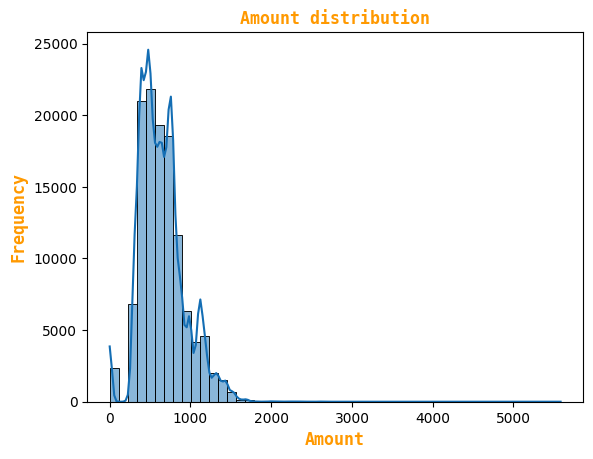

In [18]:
# Analysing amount column

# Create a histogram using Seaborn
sns.histplot(amazon_df["Amount"], bins=50, kde=True, color=amazon_blue)

# Add labels and a title
plt.xlabel("Amount", fontdict=font_dict)
plt.ylabel("Frequency", fontdict=font_dict)
plt.title("Amount distribution", fontdict=font_dict)

# Show the plot
plt.show()

**As the amount column appears to be right skewed we will replace the missing values with the median value.**

In [19]:
# Imputing missing values of column amount using median

amazon_df["Amount"].fillna(amazon_df["Amount"].median(), inplace=True)

In [20]:
# 


# Create a bar chart using Seaborn
#plt.figure(figsize=(8, 6))
#sns.barplot(x=amazon_df["promotion-ids"].value_counts().index, y=amazon_df["promotion-ids"].value_counts())

# Add labels and a title
#plt.xlabel('Category')
#plt.ylabel('Count')
#plt.title('Value Counts of Category Column')

# Show the plot
#plt.show()

In [21]:
# Saving promotion ids for future use case
promotion_ids = amazon_df["promotion-ids"]

# Dropping promotion-id

amazon_df.drop(columns="promotion-ids", inplace=True)

In [22]:
# Checking the Unnamed: 22 column

amazon_df["Unnamed: 22"].value_counts()

Unnamed: 22
False    79925
Name: count, dtype: int64

**Unnamed: 22 has only one category False which is not useful for the analysis so we will drop the column.**

In [23]:
# Dropping Unnamed: 22

amazon_df.drop(columns="Unnamed: 22", inplace=True)

In [24]:
# Looking at the column with missing values but less than 5% 

i = 1
for (col,percentage) in (amazon_df.isnull().sum()/ len(amazon_df) * 100).items():
    if percentage <= 5 and percentage > 0:
        print(f"{i}. {col} has {percentage:.2f}% of missing values\n")
        i+=1


1. ship-city has 0.03% of missing values

2. ship-state has 0.03% of missing values

3. ship-postal-code has 0.03% of missing values

4. ship-country has 0.03% of missing values



**As the missing values are less than 1% we will be dropping this records.**

In [25]:
# Dropping the records having missing values

amazon_df = amazon_df.dropna()

In [26]:
# Checking null values

amazon_df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [27]:
# Re-checking the shape

amazon_df.shape

(128942, 19)

**Now the data doesn't have missing values.**

#### Data Manipulation

In [28]:
# Checking the data type of columns

amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128942 non-null  int64  
 1   Order ID            128942 non-null  object 
 2   Date                128942 non-null  object 
 3   Status              128942 non-null  object 
 4   Fulfilment          128942 non-null  object 
 5   Sales Channel       128942 non-null  object 
 6   ship-service-level  128942 non-null  object 
 7   Style               128942 non-null  object 
 8   SKU                 128942 non-null  object 
 9   Category            128942 non-null  object 
 10  Size                128942 non-null  object 
 11  ASIN                128942 non-null  object 
 12  Qty                 128942 non-null  int64  
 13  Amount              128942 non-null  float64
 14  ship-city           128942 non-null  object 
 15  ship-state          128942 non-null  ob

**From the above information we can see that date column is object type so we will cnvert it to date type. Additionally, ship-postal-code and B2B are required to be converted to object type.**

In [29]:
# Converting column Date to date type

amazon_df["Date"] = pd.to_datetime(amazon_df["Date"])

In [30]:
# Print the time period of data

print("Start date: ", amazon_df["Date"].min())
print("End date: ", amazon_df["Date"].max())


Start date:  2022-03-31 00:00:00
End date:  2022-06-29 00:00:00


**As we can see the data is from March 2022 till June 2022.**

In [31]:
# Converting column B2B and ship-postal-code to object type

amazon_df["B2B"] = amazon_df["B2B"].astype('object')
amazon_df["ship-postal-code"] = amazon_df["ship-postal-code"].astype('int')
amazon_df["ship-postal-code"] = amazon_df["ship-postal-code"].astype('object')

In [32]:
# Save categorical columns (object or category data types)
categorical_columns = amazon_df.select_dtypes(include=["object"]).columns.tolist()

# Save numeric columns (int and float data types)
numeric_columns = amazon_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numeric Columns:", numeric_columns)

Categorical Columns: ['Order ID', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B']
Numeric Columns: ['index', 'Qty', 'Amount']


In [33]:
# Analysing Quantity column

amazon_df['Qty'].value_counts().sort_values()

Qty
15         1
9          1
13         1
8          1
5          2
4          9
3         32
2        341
0      12802
1     115752
Name: count, dtype: int64

In [34]:
# Check the categorical columns having categories greater than 20
i=1
for column in categorical_columns:
    if len(amazon_df[column].value_counts()) > 15:
        print("{0} {1} contains {2} unique categories".format(i,column,len(amazon_df[column].unique())))
        i+=1

1 Order ID contains 120350 unique categories
2 Style contains 1377 unique categories
3 SKU contains 7195 unique categories
4 ASIN contains 7190 unique categories
5 ship-city contains 8955 unique categories
6 ship-state contains 69 unique categories
7 ship-postal-code contains 9459 unique categories


In [35]:
# Analysing ship-state column

amazon_df["ship-state"].value_counts().sort_index()

ship-state
ANDAMAN & NICOBAR           257
ANDHRA PRADESH             5430
APO                           1
AR                            1
ARUNACHAL PRADESH           141
ASSAM                      1663
Arunachal Pradesh             3
Arunachal pradesh             2
BIHAR                      2086
Bihar                        27
CHANDIGARH                  322
CHHATTISGARH                909
Chandigarh                   11
DADRA AND NAGAR              70
DELHI                      6782
Delhi                       164
GOA                        1102
Goa                          30
Gujarat                    4489
HARYANA                    4415
HIMACHAL PRADESH            788
JAMMU & KASHMIR             702
JHARKHAND                  1456
KARNATAKA                 17326
KERALA                     6585
LADAKH                       43
LAKSHADWEEP                   4
MADHYA PRADESH             2529
MAHARASHTRA               22260
MANIPUR                     311
MEGHALAYA                   2

**We can see that there are some states with same spelling but different case.**

In [36]:
# Change the ship-state to title case

amazon_df["ship-state"] = amazon_df["ship-state"].str.title()

In [37]:
# Check the value count of ship-state

amazon_df["ship-state"].value_counts().sort_index()

ship-state
Andaman & Nicobar           257
Andhra Pradesh             5430
Apo                           1
Ar                            1
Arunachal Pradesh           146
Assam                      1663
Bihar                      2114
Chandigarh                  333
Chhattisgarh                909
Dadra And Nagar              70
Delhi                      6967
Goa                        1137
Gujarat                    4489
Haryana                    4415
Himachal Pradesh            788
Jammu & Kashmir             702
Jharkhand                  1456
Karnataka                 17326
Kerala                     6585
Ladakh                       43
Lakshadweep                   4
Madhya Pradesh             2529
Maharashtra               22260
Manipur                     316
Meghalaya                   207
Mizoram                      76
Nagaland                    185
New Delhi                    81
Nl                            2
Odisha                     2136
Orissa                       

In [38]:
# Analyse the city of ship-state

amazon_df[amazon_df["ship-state"].isin(("Apo","Ar","Nl","Pb","Rj"))]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
3413,3413,171-2247193-1690717,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,JNE3640,JNE3640-TP-N-M,Top,M,B08ZHM3373,1,518.0,DIMAPUR,Nl,797116,IN,False
25093,25093,407-8361131-8501960,2022-04-15,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3160,JNE3160-KR-G-XL,kurta,XL,B07K4C1KTB,1,685.0,JAIPUR,Rj,302029,IN,True
39782,39782,404-6611202-9794717,2022-04-06,Shipped,Amazon,Amazon.in,Expedited,JNE3458,JNE3458-KR-XXXL,kurta,3XL,B08HK3XSKF,1,399.0,ZIRA,Pb,142044,IN,False
45187,45187,405-0034289-0259545,2022-04-03,Cancelled,Amazon,Amazon.in,Expedited,J0077,J0077-SKD-S,Set,S,B08YNTF3X3,0,605.0,APO,Apo,959121,IN,False
49144,49144,405-8584178-5101966,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3793,JNE3793-KR-XL,kurta,XL,B09NQ6824N,1,355.0,JODHPUR,Rj,342009,IN,False
51420,51420,407-1375529-7104311,2022-05-30,Shipped,Amazon,Amazon.in,Expedited,JNE3659,JNE3659-TP-N-L,Top,L,B08ZHT1PKK,1,493.0,ITANAGAR,Ar,791113,IN,False
94844,94844,171-4171855-7000362,2022-06-26,Shipped,Amazon,Amazon.in,Expedited,JNE3654,JNE3654-TP-M,Top,M,B09B3HRDLP,1,443.0,DIMAPUR,Nl,797116,IN,False


**We can see that there are some abbrevated states so we will look at the city and replace the abbrevated state with the state name.**

In [39]:
# Replace abbrevated state with the state name

amazon_df["ship-state"] = amazon_df["ship-state"].replace({"Nl":"Nagaland","Rj":"Rajasthan","Pb":"Punjab","Ar":"Arunachal Pradesh","Orissa":"Odisha","Puducherry":"Pondicherry","Punjab/Mohali/Zirakpur":"Punjab","Rajshthan":"Rajasthan","Rajsthan":"Rajasthan"})

In [40]:
# Drop the row wth state and city as Apo

amazon_df = amazon_df[~(amazon_df["ship-state"] == "Apo")]

In [41]:
amazon_df["ship-state"].value_counts().sort_index()

ship-state
Andaman & Nicobar       257
Andhra Pradesh         5430
Arunachal Pradesh       147
Assam                  1663
Bihar                  2114
Chandigarh              333
Chhattisgarh            909
Dadra And Nagar          70
Delhi                  6967
Goa                    1137
Gujarat                4489
Haryana                4415
Himachal Pradesh        788
Jammu & Kashmir         702
Jharkhand              1456
Karnataka             17326
Kerala                 6585
Ladakh                   43
Lakshadweep               4
Madhya Pradesh         2529
Maharashtra           22260
Manipur                 316
Meghalaya               207
Mizoram                  76
Nagaland                187
New Delhi                81
Odisha                 2139
Pondicherry             351
Punjab                 1919
Rajasthan              2718
Sikkim                  205
Tamil Nadu            11483
Telangana             11330
Tripura                 151
Uttar Pradesh         10638
Uttarakha

In [42]:
# Check the value counts of categorical columns
i=1
for column in categorical_columns:
    if len(amazon_df[column].value_counts()) < 15:
        print(i,amazon_df[column].value_counts())
        print()
        i+=1

1 Status
Shipped                          77788
Shipped - Delivered to Buyer     28762
Cancelled                        18324
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

2 Fulfilment
Amazon      89677
Merchant    39264
Name: count, dtype: int64

3 Sales Channel 
Amazon.in     128817
Non-Amazon       124
Name: count, dtype: int64

4 ship-service-level
Expedited    88594
Standard     40347
Name: count, dtype: int64



5 Category
Set              50271
kurta            49859
Western Dress    15499
Top              10620
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

6 Size
M       22704
L       22123
XL      20872
XXL     18093
S       17083
3XL     14815
XS      11160
6XL       738
5XL       550
4XL       425
Free      378
Name: count, dtype: int64

7 ship-country
IN    128941
Name: count, dtype: int64

8 B2B
False    128070
True        871
Name: count, dtype: int64



**As ship-country column has one country we will drop this column.**

In [43]:
# Dropping ship-country

amazon_df.drop(columns="ship-country", inplace=True)

In [44]:
def clean_and_uppercase(df, column_name):
    df[column_name] = df[column_name].str.replace(r'[^a-zA-Z ]', '', regex=True)  # Remove special characters
    df[column_name] = df[column_name].str.upper()  # Convert to uppercase

# Cleaning ship-city
clean_and_uppercase(amazon_df, "ship-city")

In [45]:
amazon_df.shape

(128941, 18)

#### Outlier Analysis

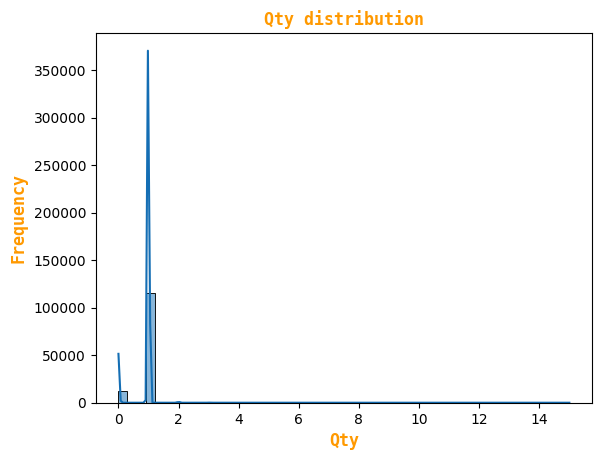

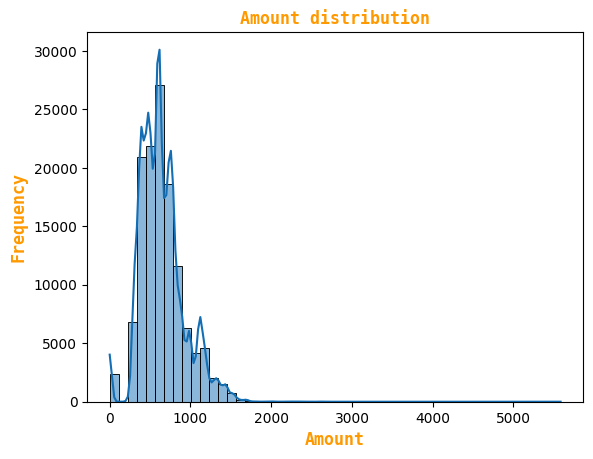

In [46]:
# Checking for distribution of numeric columns

for column in numeric_columns[1:]:
    
    # Create a histogram using Seaborn
    sns.histplot(amazon_df[column], bins=50, kde=True, color=amazon_blue)

    # Add labels and a title
    plt.xlabel(column, fontdict=font_dict)
    plt.ylabel("Frequency", fontdict=font_dict)
    plt.title(column+" distribution", fontdict=font_dict)

    # Show the plot
    plt.show()

**From the above histogram we can see that both quantity and amont seems to be right skewed so we need to handle the outliers.**

In [47]:
# Describing Qty and Amount columns

amazon_df[["Qty","Amount"]].describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])



,Qty,Amount
count,128941.000000,128941.000000
mean,0.904452,645.940138
std,0.313331,272.790076
min,0.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,605.000000
75%,1.000000,771.000000
80%,1.000000,824.000000
90%,1.000000,1033.000000
95%,1.000000,1166.000000


In [48]:
# Truncate outliers at the 99th percentile

for column in numeric_columns[1:]:
    threshold = amazon_df[column].quantile(0.99)
    amazon_df[column] = amazon_df[column].apply(lambda x: threshold if x > threshold else x)

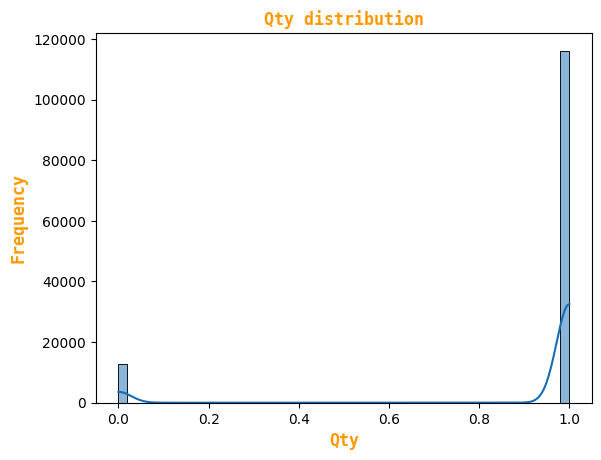

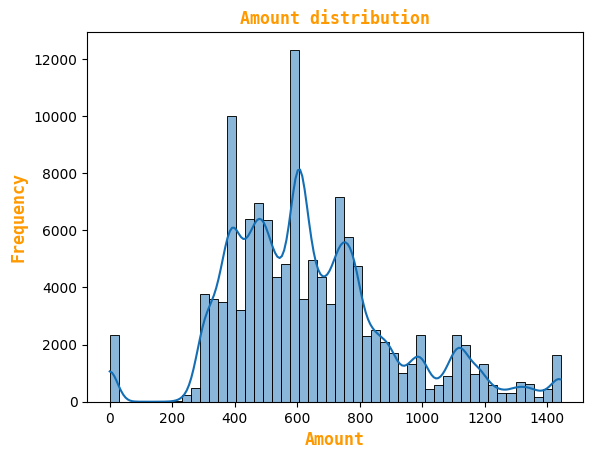

In [49]:
# Checking for distribution of numeric columns

for column in numeric_columns[1:]:
    
    # Create a histogram using Seaborn
    sns.histplot(amazon_df[column], bins=50, kde=True, color=amazon_blue)

    # Add labels and a title
    plt.xlabel(column, fontdict=font_dict)
    plt.ylabel("Frequency", fontdict=font_dict)
    plt.title(column+" distribution", fontdict=font_dict)

    # Show the plot
    plt.show()

In [50]:
amazon_df.shape

(128941, 18)

In [51]:
amazon_df.to_csv("Amazon_cleaned_dataset.csv")

In [52]:
amazon_df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B'],
      dtype='object')

### Sale Report dataset

In [53]:
# Read Sale Report csv file

inventory_df = pd.read_csv("Sale Report.csv")

# Display first 5 rows

inventory_df.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [54]:
# Dispaly the size and dimension

inventory_df.shape

print("Size of Sale report data : {} records".format(inventory_df.shape[0]))
print("Dimension of Sale report data: {} columns".format(inventory_df.shape[1]))

Size of Sale report data : 9271 records
Dimension of Sale report data: 7 columns


In [55]:
# Display the information of data

inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [56]:
# Drop index column 

inventory_df.drop(columns="index", inplace=True)

In [57]:
# Checking null values

inventory_df.isnull().sum()

SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64

In [58]:
# Dispaly columns with null values and their respetive percenatge
i = 1
for (col,percentage) in (inventory_df.isnull().sum()/ len(inventory_df) * 100).items():
    if percentage > 0:
        print(f"{i}. {col} has {percentage:.2f}% of missing values")
        i+=1

1. SKU Code has 0.90% of missing values
2. Design No. has 0.39% of missing values
3. Stock has 0.39% of missing values
4. Category has 0.49% of missing values
5. Size has 0.39% of missing values
6. Color has 0.49% of missing values


In [59]:
# Dropping the records having missing values

inventory_df = inventory_df.dropna()

In [60]:
# Checking null values

inventory_df.isnull().sum()

SKU Code      0
Design No.    0
Stock         0
Category      0
Size          0
Color         0
dtype: int64

In [61]:
# Save categorical columns (object or category data types)

inventory_cat_cols = inventory_df.select_dtypes(include=["object"]).columns.tolist()

In [62]:
# Check the value counts of categorical columns
i=1
for column in inventory_cat_cols:
    if len(inventory_df[column].value_counts()) < 100:
        print(i,inventory_df[column].value_counts())
        print()
        i+=1

1 Category
KURTA                   3704
KURTA SET               1596
SET                     1049
TOP                      861
DRESS                    700
BLOUSE                   234
NIGHT WEAR               217
TUNIC                    154
SAREE                    147
AN : LEGGINGS            130
PALAZZO                   91
PANT                      91
CROP TOP                  42
SHARARA                   40
LEHENGA CHOLI             35
KURTI                     28
SKIRT                     20
BOTTOM                    19
CARDIGAN                  16
JUMPSUIT                   7
CROP TOP WITH PLAZZO       7
Name: count, dtype: int64

2 Size
S       1351
M       1341
XL      1339
XXL     1337
L       1335
XS      1110
XXXL    1066
FREE     216
5XL       32
4XL       31
6XL       30
Name: count, dtype: int64

3 Color
Blue               777
Pink               777
Black              654
Green              640
Maroon             481
Grey               454
White              409
Teal   

In [63]:
# Replace category value

inventory_df["Category"] = inventory_df["Category"].replace({"AN : LEGGINGS":"LEGGINGS"})

In [64]:
# Change the font to title case

inventory_df["Category"] = inventory_df["Category"].str.title()
inventory_df["Color"] = inventory_df["Color"].str.title()

In [65]:
# Print the number of unique Design no and SKU code

print("Number of unique Design no: ", len(inventory_df["Design No."].unique()))
print("Number of unique SKU: ", len(inventory_df["SKU Code"].unique()))

Number of unique Design no:  1591
Number of unique SKU:  9170


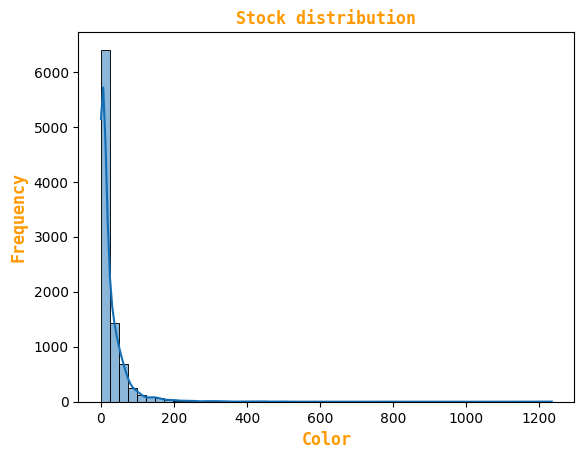

In [66]:
# Create a histogram using Seaborn

sns.histplot(inventory_df["Stock"], bins=50, kde=True, color=amazon_blue)

# Add labels and a title
plt.xlabel(column, fontdict=font_dict)
plt.ylabel("Frequency", fontdict=font_dict)
plt.title("Stock distribution", fontdict=font_dict)

# Show the plot
plt.show()

In [67]:
# Describing Qty and Amount columns

inventory_df[["Stock"]].describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])



,Stock
count,9188.000000
mean,26.378973
std,58.582786
min,0.000000
25%,3.000000
50%,8.000000
75%,31.000000
80%,39.000000
90%,62.000000
95%,94.000000


In [68]:
# Checking the records having stock quantity greater than 500

inventory_df[inventory_df["Stock"] > 250].sort_values(by="Stock", ascending=False)

,SKU Code,Design No.,Stock,Category,Size,Color
3948,JNE3405-KR-XXL,JNE3405,1234.0,Kurta,XXL,Pink
3947,JNE3405-KR-XS,JNE3405,1230.0,Kurta,XS,Pink
3300,JNE1525-KR-UDF19BLACK-M,JNE1525,1082.0,Kurta,M,Black
3789,JNE3368-KR-XXXL,JNE3368,985.0,Kurta,XXXL,Light Green
3495,JNE2270-KR-487-XXL,JNE2270,949.0,Kurta,XXL,Beige
8301,SET273-KR-NP-M,SET273,880.0,Kurta Set,M,Brown
3299,JNE1525-KR-UDF19BLACK-L,JNE1525,874.0,Kurta,L,Black
8302,SET273-KR-NP-S,SET273,871.0,Kurta Set,S,Brown
8304,SET273-KR-NP-XS,SET273,862.0,Kurta Set,XS,Brown
3302,JNE1525-KR-UDF19BLACK-XL,JNE1525,844.0,Kurta,XL,Black


In [69]:
# Output cleaned dataset

inventory_df.to_csv("Inventory_cleaned_dataset.csv")

### P L March 2021 dataset
 

In [70]:
# Read P L March 2021 csv file

March2021_df = pd.read_csv("P  L March 2021.csv")

# Display first 5 rows

March2021_df.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [71]:
# Dispaly the size and dimension

March2021_df.shape

print("Size of March 2021 data : {} records".format(March2021_df.shape[0]))
print("Dimension of March 2021 data: {} columns".format(March2021_df.shape[1]))

Size of March 2021 data : 1330 records
Dimension of March 2021 data: 18 columns


In [72]:
# Display the information of data

March2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP 1            1330 non-null   object
 7   TP 2            1330 non-null   object
 8   MRP Old         1330 non-null   object
 9   Final MRP Old   1330 non-null   object
 10  Ajio MRP        1330 non-null   object
 11  Amazon MRP      1330 non-null   object
 12  Amazon FBA MRP  1330 non-null   object
 13  Flipkart MRP    1330 non-null   object
 14  Limeroad MRP    1330 non-null   object
 15  Myntra MRP      1330 non-null   object
 16  Paytm MRP       1330 non-null   object
 17  Snapdeal MRP    1330 non-null   object
dtypes: int64

In [73]:
# Drop index column 

March2021_df.drop(columns="index", inplace=True)

In [74]:
# Re-name column TP1 and TP2

March2021_df.rename(columns={"TP 1": "First_third_party_platform_price", "TP 2": "Second_third_party_platform_price"}, inplace=True)

In [75]:
# Checking null values

March2021_df.isnull().sum()

Sku                                  0
Style Id                             0
Catalog                              0
Category                             0
Weight                               0
First_third_party_platform_price     0
Second_third_party_platform_price    0
MRP Old                              0
Final MRP Old                        0
Ajio MRP                             0
Amazon MRP                           0
Amazon FBA MRP                       0
Flipkart MRP                         0
Limeroad MRP                         0
Myntra MRP                           0
Paytm MRP                            0
Snapdeal MRP                         0
dtype: int64

In [76]:
March2021_df[March2021_df["First_third_party_platform_price"] == "#VALUE!"]

,Sku,Style Id,Catalog,Category,Weight,First_third_party_platform_price,Second_third_party_platform_price,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
1230,Os1041_S,Os1041,Mix,Kurta Set,0.4,#VALUE!,#VALUE!,Nill,Nill,Nill,Nill,Nill,Nill,Nill,2895,Nill,Nill
1231,Os1041_M,Os1041,Mix,Kurta Set,0.4,#VALUE!,#VALUE!,Nill,Nill,Nill,Nill,Nill,Nill,Nill,2895,Nill,Nill
1232,Os1041_L,Os1041,Mix,Kurta Set,0.4,#VALUE!,#VALUE!,Nill,Nill,Nill,Nill,Nill,Nill,Nill,2895,Nill,Nill
1233,Os1041_XL,Os1041,Mix,Kurta Set,0.4,#VALUE!,#VALUE!,Nill,Nill,Nill,Nill,Nill,Nill,Nill,2895,Nill,Nill
1234,Os1041_2XL,Os1041,Mix,Kurta Set,0.4,#VALUE!,#VALUE!,Nill,Nill,Nill,Nill,Nill,Nill,Nill,2895,Nill,Nill
1235,Os1041_3XL,Os1041,Mix,Kurta Set,0.4,#VALUE!,#VALUE!,Nill,Nill,Nill,Nill,Nill,Nill,Nill,2895,Nill,Nill


In [77]:
# Converting the column type to integer
columns_to_convert = ["Weight",
    "First_third_party_platform_price",
    "Second_third_party_platform_price",
    "MRP Old",
    "Final MRP Old",
    "Ajio MRP",
    "Amazon MRP",
    "Amazon FBA MRP",
    "Flipkart MRP",
    "Limeroad MRP",
    "Myntra MRP",
    "Paytm MRP",
    "Snapdeal MRP"
]

for col in columns_to_convert:
    March2021_df[col] = pd.to_numeric(March2021_df[col], errors='coerce')

In [78]:
# Checking null values

March2021_df.isnull().sum()

Sku                                   0
Style Id                              0
Catalog                               0
Category                              0
Weight                               73
First_third_party_platform_price      6
Second_third_party_platform_price     6
MRP Old                              37
Final MRP Old                        37
Ajio MRP                             37
Amazon MRP                           37
Amazon FBA MRP                       37
Flipkart MRP                         37
Limeroad MRP                         37
Myntra MRP                           31
Paytm MRP                            37
Snapdeal MRP                         37
dtype: int64

In [79]:
# Dispaly columns with null values and their respetive percenatge
i = 1
for (col,percentage) in (March2021_df.isnull().sum()/ len(March2021_df) * 100).items():
    if percentage > 0:
        print(f"{i}. {col} has {percentage:.2f}% of missing values")
        i+=1

1. Weight has 5.49% of missing values
2. First_third_party_platform_price has 0.45% of missing values
3. Second_third_party_platform_price has 0.45% of missing values
4. MRP Old has 2.78% of missing values
5. Final MRP Old has 2.78% of missing values
6. Ajio MRP has 2.78% of missing values
7. Amazon MRP has 2.78% of missing values
8. Amazon FBA MRP has 2.78% of missing values
9. Flipkart MRP has 2.78% of missing values
10. Limeroad MRP has 2.78% of missing values
11. Myntra MRP has 2.33% of missing values
12. Paytm MRP has 2.78% of missing values
13. Snapdeal MRP has 2.78% of missing values


In [80]:
# Dropping the records having missing values

March2021_df = March2021_df.dropna()

In [81]:
# Check the value counts of categorical columns

March_2021_cat_cols = ["Style Id", "Catalog", "Category"]
i=1
for column in March_2021_cat_cols:
    if len(March2021_df[column].value_counts()) < 100:
        print(i,March2021_df[column].value_counts())
        print()
        i+=1

1 Catalog
Mix            794
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64

2 Category
Kurta        802
Kurta Set    342
Tops          45
Gown          32
Name: count, dtype: int64



In [82]:
March2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Sku                                1221 non-null   object 
 1   Style Id                           1221 non-null   object 
 2   Catalog                            1221 non-null   object 
 3   Category                           1221 non-null   object 
 4   Weight                             1221 non-null   float64
 5   First_third_party_platform_price   1221 non-null   float64
 6   Second_third_party_platform_price  1221 non-null   float64
 7   MRP Old                            1221 non-null   float64
 8   Final MRP Old                      1221 non-null   float64
 9   Ajio MRP                           1221 non-null   float64
 10  Amazon MRP                         1221 non-null   float64
 11  Amazon FBA MRP                     1221 non-null   float64
 1

In [83]:
# Output cleaned dataset

March2021_df.to_csv("March2021_cleaned_dataset.csv")

### May 2022 dataset

In [84]:
# Read P L March csv file

May2022_df = pd.read_csv("May-2022.csv")

# Display first 5 rows

May2022_df.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [85]:
# Dispaly the size and dimension

May2022_df.shape

print("Size of May 2020 data : {} records".format(May2022_df.shape[0]))
print("Dimension of May 2020 data: {} columns".format(May2022_df.shape[1]))

Size of May 2020 data : 1330 records
Dimension of May 2020 data: 17 columns


In [86]:
# Display the information of data

May2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP              1330 non-null   object
 7   MRP Old         1330 non-null   object
 8   Final MRP Old   1330 non-null   object
 9   Ajio MRP        1330 non-null   object
 10  Amazon MRP      1330 non-null   object
 11  Amazon FBA MRP  1330 non-null   object
 12  Flipkart MRP    1330 non-null   object
 13  Limeroad MRP    1330 non-null   object
 14  Myntra MRP      1330 non-null   object
 15  Paytm MRP       1330 non-null   object
 16  Snapdeal MRP    1330 non-null   object
dtypes: int64(1), object(16)
memory usage: 176.8+ KB


In [87]:
# Drop index column 

May2022_df.drop(columns="index", inplace=True)

In [88]:
# Re-name column TP

May2022_df.rename(columns={"TP": "original_prod_price"}, inplace=True)

In [89]:
# Checking null values

May2022_df.isnull().sum()

Sku                    0
Style Id               0
Catalog                0
Category               0
Weight                 0
original_prod_price    0
MRP Old                0
Final MRP Old          0
Ajio MRP               0
Amazon MRP             0
Amazon FBA MRP         0
Flipkart MRP           0
Limeroad MRP           0
Myntra MRP             0
Paytm MRP              0
Snapdeal MRP           0
dtype: int64

In [90]:
# Removing records with junk values in price columns

May2022_df = May2022_df[~(May2022_df["original_prod_price"] == "#VALUE!")]

In [91]:
# Converting the column type to integer
columns_to_convert = ["Weight",
    "original_prod_price",
    "MRP Old",
    "Final MRP Old",
    "Ajio MRP",
    "Amazon MRP",
    "Amazon FBA MRP",
    "Flipkart MRP",
    "Limeroad MRP",
    "Myntra MRP",
    "Paytm MRP",
    "Snapdeal MRP"
]

for col in columns_to_convert:
    May2022_df[col] = pd.to_numeric(May2022_df[col], errors='coerce')

In [92]:
# Dispaly columns with null values and their respetive percenatge
i = 1
for (col,percentage) in (May2022_df.isnull().sum()/ len(May2022_df) * 100).items():
    if percentage > 0:
        print(f"{i}. {col} has {percentage:.2f}% of missing values")
        i+=1

1. Weight has 5.51% of missing values
2. MRP Old has 2.34% of missing values
3. Final MRP Old has 2.34% of missing values
4. Ajio MRP has 2.34% of missing values
5. Amazon MRP has 2.34% of missing values
6. Amazon FBA MRP has 2.34% of missing values
7. Flipkart MRP has 2.34% of missing values
8. Limeroad MRP has 2.34% of missing values
9. Myntra MRP has 2.34% of missing values
10. Paytm MRP has 2.34% of missing values
11. Snapdeal MRP has 2.34% of missing values


In [93]:
# Dropping the records having missing values

May2022_df = May2022_df.dropna()

In [94]:
May2022_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 0 to 1329
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sku                  1221 non-null   object 
 1   Style Id             1221 non-null   object 
 2   Catalog              1221 non-null   object 
 3   Category             1221 non-null   object 
 4   Weight               1221 non-null   float64
 5   original_prod_price  1221 non-null   float64
 6   MRP Old              1221 non-null   float64
 7   Final MRP Old        1221 non-null   float64
 8   Ajio MRP             1221 non-null   float64
 9   Amazon MRP           1221 non-null   float64
 10  Amazon FBA MRP       1221 non-null   float64
 11  Flipkart MRP         1221 non-null   float64
 12  Limeroad MRP         1221 non-null   float64
 13  Myntra MRP           1221 non-null   float64
 14  Paytm MRP            1221 non-null   float64
 15  Snapdeal MRP         1221 non-null   float6

In [95]:
# Check the value counts of categorical columns

May_2022_cat_cols = ["Style Id", "Catalog", "Category"]
i=1
for column in May_2022_cat_cols:
    if len(May2022_df[column].value_counts()) < 100:
        print(i,May2022_df[column].value_counts())
        print()
        i+=1

1 Catalog
Mix            794
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64

2 Category
Kurta        802
Kurta Set    342
Tops          45
Gown          32
Name: count, dtype: int64



In [96]:
# Output cleaned dataset

May2022_df.to_csv("May2022_cleaned_dataset.csv")

Multi co- linearity

### International Sale Report dataset

In [144]:
# Read International Sale Report csv file

international_df = pd.read_csv("International Sale Report.csv")

# Display first 5 rows

international_df.head()

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00


In [145]:
# Dispaly the size and dimension

international_df.shape

print("Size of May 2020 data : {} records".format(international_df.shape[0]))
print("Dimension of May 2020 data: {} columns".format(international_df.shape[1]))

Size of May 2020 data : 37432 records
Dimension of May 2020 data: 10 columns


In [146]:
# Display the information of data

international_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      37432 non-null  int64 
 1   DATE       37431 non-null  object
 2   Months     37407 non-null  object
 3   CUSTOMER   36392 non-null  object
 4   Style      36392 non-null  object
 5   SKU        34958 non-null  object
 6   Size       36392 non-null  object
 7   PCS        36392 non-null  object
 8   RATE       36392 non-null  object
 9   GROSS AMT  36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [147]:
# Drop index column 

international_df.drop(columns=["index"], inplace=True)

In [148]:
international_df[international_df['Style'] == 'SHIPPING'].head(10)

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
19696,REVATHY LOGANATHAN,06-05-21,Jun-21,SHIPPING,SHIPPING,1.00,2250.00,2250.00,0.00
19751,FARIA ESSOPP,06-08-21,Jun-21,SHIPPING,SHIPPING,1.00,11000.00,11000.00,0.00
19816,MANGALAM SHOP,06-11-21,Jun-21,SHIPPING,SHIPPING,1.00,8600.00,8600.00,0.00
19845,THANA NAGISSWARY L MARIMUTHU,06-15-21,Jun-21,SHIPPING,SHIPPING,1.00,5800.00,5800.00,0.00
19865,REVATHY LOGANATHAN,06-17-21,Jun-21,SHIPPING,SHIPPING,1.00,2200.00,2200.00,0.00
19877,MR.ALWAR MURALI,06-18-21,Jun-21,SHIPPING,SHIPPING,1.00,2100.00,2100.00,0.00
19898,RAZIA ROSEANE NASER,06-18-21,Jun-21,SHIPPING,SHIPPING,1.00,5100.00,5100.00,0.00
19913,SIRI PADALA,06-19-21,Jun-21,SHIPPING,SHIPPING,1.00,2500.00,2500.00,0.00
19943,FUSION FASHIONS CORP.,06-23-21,Jun-21,SHIPPING,SHIPPING,1.00,10560.00,10560.00,0.00
19969,MIZNA WAHEEDH,06-23-21,Jun-21,SHIPPING,SHIPPING,1.00,6020.00,6020.00,0.00


In [149]:
def modify_dataframe(df):
    error_list = []

    # Step 1: Check if Style is "Shipping" and store corresponding DATE values in error_list
    error_list = df[df['Style'] == 'SHIPPING']['DATE'].tolist()

    #print(df[df["DATE"].isin(error_list)].shape)
    # Print the shape of the DataFrame with matching 'DATE' values
    matching_df_shape = df[df['DATE'].isin(error_list)].shape
    print(f"Shape of DataFrame with matching 'DATE' values: {matching_df_shape}")

    # Step 2: Replace values as described
    df.loc[df['DATE'].isin(error_list), 'CUSTOMER'], df.loc[df['DATE'].isin(error_list), 'DATE'] = df['DATE'], df['Months']
    df.loc[df['DATE'].isin(error_list), 'Months'], df.loc[df['DATE'].isin(error_list), 'CUSTOMER'] = df['CUSTOMER'], df['Months']
    df.loc[df['DATE'].isin(error_list), 'PCS'], df.loc[df['DATE'].isin(error_list), 'RATE'] = df['GROSS AMT'], df['RATE']
    df.loc[df['DATE'].isin(error_list), 'GROSS AMT'], df.loc[df['DATE'].isin(error_list), 'RATE'] = df['RATE'], df['PCS']

    # Step 3: Replace the initial values of CUSTOMER and PCS in Months and PCS columns
    df.loc[df['DATE'].isin(error_list), 'Months'], df.loc[df['DATE'].isin(error_list), 'RATE'] = df['CUSTOMER'], df['PCS']
    df.loc[df['DATE'].isin(error_list), 'CUSTOMER'], df.loc[df['DATE'].isin(error_list), 'PCS'] = '', ''

    return df



In [150]:
error_list = international_df[international_df['Style'] == 'SHIPPING']['DATE'].tolist()

#print(df[df["DATE"].isin(error_list)].shape)
# Print the shape of the DataFrame with matching 'DATE' values
matching_df_shape = international_df[international_df['DATE'].isin(error_list)].shape
print(f"Shape of DataFrame with matching 'DATE' values: {matching_df_shape}")

Shape of DataFrame with matching 'DATE' values: (16554, 9)


In [151]:
# Call the function to modify the DataFrame
international_df = modify_dataframe(international_df)

Shape of DataFrame with matching 'DATE' values: (16554, 9)


In [152]:
international_df.head()

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00


In [153]:
international_df[international_df["CUSTOMER"] == "SIRI PADALA"].tail(10)

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
19904,06-19-21,06-19-21,SIRI PADALA,J0138,J0138-KR-S,1.00,649.35,649.00,4.00
19905,06-19-21,06-19-21,SIRI PADALA,J0148,J0148-SET-S,1.00,876.85,877.00,4.00
19906,06-19-21,06-19-21,SIRI PADALA,J0207,J0207-DR-S,1.00,811.85,812.00,1.00
19907,06-19-21,06-19-21,SIRI PADALA,MEN5029,MEN5029-KR-M,1.00,616.56,617.00,41.00
19908,06-19-21,06-19-21,SIRI PADALA,MEN5008,MEN5008-KR-M,1.00,616.56,617.00,9.00
19909,06-19-21,06-19-21,SIRI PADALA,MEN5003,MEN5003-KR-M,1.00,616.56,617.00,35.00
19910,06-19-21,06-19-21,SIRI PADALA,MEN5013,MEN5013-KR-M,1.00,649.03,649.00,7.00
19911,06-19-21,06-19-21,SIRI PADALA,J0202,J0202-TP-S,1.00,649.35,649.00,4.00
19912,06-19-21,06-19-21,SIRI PADALA,J0213,J0213-TP-S,1.00,584.35,584.00,31.00
19913,06-19-21,06-19-21,SIRI PADALA,SHIPPING,SHIPPING,1.00,2500.00,2500.00,0.00


In [154]:

international_df["Size"] = international_df["Size"].apply(lambda x: 'Missing' if str(x).replace(".", "", 1).isdigit() else x)

In [155]:
international_df[international_df["CUSTOMER"] == "SIRI PADALA"].tail(10)

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
19904,06-19-21,06-19-21,SIRI PADALA,J0138,J0138-KR-S,Missing,649.35,649.00,4.00
19905,06-19-21,06-19-21,SIRI PADALA,J0148,J0148-SET-S,Missing,876.85,877.00,4.00
19906,06-19-21,06-19-21,SIRI PADALA,J0207,J0207-DR-S,Missing,811.85,812.00,1.00
19907,06-19-21,06-19-21,SIRI PADALA,MEN5029,MEN5029-KR-M,Missing,616.56,617.00,41.00
19908,06-19-21,06-19-21,SIRI PADALA,MEN5008,MEN5008-KR-M,Missing,616.56,617.00,9.00
19909,06-19-21,06-19-21,SIRI PADALA,MEN5003,MEN5003-KR-M,Missing,616.56,617.00,35.00
19910,06-19-21,06-19-21,SIRI PADALA,MEN5013,MEN5013-KR-M,Missing,649.03,649.00,7.00
19911,06-19-21,06-19-21,SIRI PADALA,J0202,J0202-TP-S,Missing,649.35,649.00,4.00
19912,06-19-21,06-19-21,SIRI PADALA,J0213,J0213-TP-S,Missing,584.35,584.00,31.00
19913,06-19-21,06-19-21,SIRI PADALA,SHIPPING,SHIPPING,Missing,2500.00,2500.00,0.00


In [156]:
# Drop rows where the 'SKU' column is "SHIPPING"
international_df = international_df[international_df["SKU"] != 'SHIPPING']

In [157]:
# Apply the lambda function to the DataFrame
international_df["Size"] = international_df.apply(lambda row: str(row["SKU"])[-1] if row["Size"] == "Missing" else row["Size"], axis=1)


In [158]:
international_df[international_df["CUSTOMER"] == "SIRI PADALA"].tail(10)

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
19903,06-19-21,06-19-21,SIRI PADALA,J0279,J0279-SET-S,S,1039.35,1039.00,48.00
19904,06-19-21,06-19-21,SIRI PADALA,J0138,J0138-KR-S,S,649.35,649.00,4.00
19905,06-19-21,06-19-21,SIRI PADALA,J0148,J0148-SET-S,S,876.85,877.00,4.00
19906,06-19-21,06-19-21,SIRI PADALA,J0207,J0207-DR-S,S,811.85,812.00,1.00
19907,06-19-21,06-19-21,SIRI PADALA,MEN5029,MEN5029-KR-M,M,616.56,617.00,41.00
19908,06-19-21,06-19-21,SIRI PADALA,MEN5008,MEN5008-KR-M,M,616.56,617.00,9.00
19909,06-19-21,06-19-21,SIRI PADALA,MEN5003,MEN5003-KR-M,M,616.56,617.00,35.00
19910,06-19-21,06-19-21,SIRI PADALA,MEN5013,MEN5013-KR-M,M,649.03,649.00,7.00
19911,06-19-21,06-19-21,SIRI PADALA,J0202,J0202-TP-S,S,649.35,649.00,4.00
19912,06-19-21,06-19-21,SIRI PADALA,J0213,J0213-TP-S,S,584.35,584.00,31.00


In [159]:
international_df[international_df["Size"] == "9"]

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
25910,11-01-21,11-01-21,RANDHIR CHAUDHARY,SAR079,SAR079,9,1903.75,3693.00,0.00
27786,01-28-22,01-28-22,THANA MARIMUTHU,CMB5,CMB5-JNE3829,9,299.00,1495.00,0.00
27788,01-28-22,01-28-22,THANA MARIMUTHU,CMB5,CMB5-JNE3849,9,299.00,1495.00,0.00
28001,02-05-22,02-05-22,THILAS BOMBAY BOUTIQUE SDN BHD,CMB5,CMB5-JNE3849,9,299.00,1495.00,0.00
28367,02-12-22,02-12-22,VAHARSHA BOUTIQUE,CMB5,CMB5-JNE3849,9,299.00,4485.00,0.00
28374,02-12-22,02-12-22,VAHARSHA BOUTIQUE,CMB5,CMB5-JNE3839,9,374.00,3740.00,0.00
28455,02-14-22,02-14-22,SINDHU,SAR049,SAR049,9,598.50,598.00,92.00
28905,02-22-22,02-22-22,MR.JEYARAJ,CMB5,CMB5-JNE3839,9,374.00,1870.00,0.00
29916,03-03-22,03-03-22,IBRAHIM MAFTHOOH(JANASYA.IN),CMB5,CMB5-JNE3839,9,374.00,1776.00,0.00
29923,03-03-22,03-03-22,IBRAHIM MAFTHOOH(JANASYA.IN),CMB5,CMB5-JNE3849,9,299.00,1420.00,0.00


In [160]:
international_df["Size"].value_counts()

Size
L           14349
M            6420
S            5643
XL           3256
XXL          2684
XXXL         1653
XS            879
Free          241
.             132
5XL           117
6XL           109
4XL           100
9              24
8              23
E              21
0              19
I              19
5              17
3              17
n              17
6              16
7              15
C              14
4              12
D              11
K              10
2              10
S TO XXL        9
1               9
FREE            8
s               6
xxxl            4
xxl             4
xl              4
l               4
m               4
)               2
G               1
PCS             1
Name: count, dtype: int64

In [163]:
# Capitalize the values in the 'Size' column
international_df["Size"] = international_df["Size"].str.upper()

In [164]:
international_df["Size"].value_counts()

Size
L           14353
M            6424
S            5649
XL           3260
XXL          2688
XXXL         1657
XS            879
FREE          249
.             132
5XL           117
6XL           109
4XL           100
9              24
8              23
E              21
I              19
0              19
5              17
3              17
N              17
6              16
7              15
C              14
4              12
D              11
K              10
2              10
S TO XXL        9
1               9
)               2
G               1
PCS             1
Name: count, dtype: int64

In [165]:
# Filter the DataFrame to keep rows with allowed 'Size' values
international_df = international_df[international_df["Size"].isin(["S", "M", "L", "XL", "XXL", "XXXL", "4XL", "5XL", "6XL", "FREE"])]

In [166]:
international_df["Size"].value_counts()

Size
L       14353
M        6424
S        5649
XL       3260
XXL      2688
XXXL     1657
FREE      249
5XL       117
6XL       109
4XL       100
Name: count, dtype: int64

In [167]:
# Converting column Date to date type

international_df["DATE"] = pd.to_datetime(international_df["DATE"], errors="coerce")

In [168]:
print(international_df["DATE"].max())

print(international_df["DATE"].min())

2022-05-11 00:00:00
2021-06-05 00:00:00


In [169]:
# Checking null values

international_df.isnull().sum()

DATE         1194
Months          0
CUSTOMER        0
Style           0
SKU          1315
Size            0
PCS             0
RATE            0
GROSS AMT       0
dtype: int64

In [170]:
# Dispaly columns with null values and their respetive percenatge
i = 1
for (col,percentage) in (international_df.isnull().sum()/ len(international_df) * 100).items():
    if percentage > 0:
        print(f"{i}. {col} has {percentage:.2f}% of missing values")
        i+=1

1. DATE has 3.45% of missing values
2. SKU has 3.80% of missing values


In [171]:
international_df[international_df.isna()].head()

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
# Dropping the records having missing values

international_df = international_df.dropna()

In [173]:
# Drop Months column 

international_df.drop(columns=["Months"], inplace=True)

In [174]:
international_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32097 entries, 0 to 37430
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       32097 non-null  datetime64[ns]
 1   CUSTOMER   32097 non-null  object        
 2   Style      32097 non-null  object        
 3   SKU        32097 non-null  object        
 4   Size       32097 non-null  object        
 5   PCS        32097 non-null  object        
 6   RATE       32097 non-null  object        
 7   GROSS AMT  32097 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 2.2+ MB


In [175]:
# Converting the column type to integer
columns_to_convert = ["PCS",
    "RATE",
    "GROSS AMT",
]

for col in columns_to_convert:
    international_df[col] = pd.to_numeric(international_df[col], errors='coerce')

In [176]:
# Output cleaned dataset

international_df.to_csv("International_cleaned_dataset.csv")

### Feature Engineering

**Note: Starting here we will only be using amazon_df dataframe as it is the primary dataset used for prediction of Apparel amount.**

In [53]:
amazon_df["Date"].head()

0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: Date, dtype: datetime64[ns]

In [54]:
# Derive the day of the week and month and create new columns

amazon_df['Day_of_Week'] = pd.to_datetime(amazon_df['Date']).dt.dayofweek
amazon_df['Month'] = pd.to_datetime(amazon_df['Date']).dt.month

In [55]:
amazon_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Day_of_Week,Month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0.0,647.62,MUMBAI,Maharashtra,400081,False,5,4
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1.0,406.00,BENGALURU,Karnataka,560085,False,5,4
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1.0,329.00,NAVI MUMBAI,Maharashtra,410210,True,5,4
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0.0,753.33,PUDUCHERRY,Pondicherry,605008,False,5,4
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1.0,574.00,CHENNAI,Tamil Nadu,600073,False,5,4


In [56]:
# Sropping columns which are not relevant for model building

amazon_df.drop(columns=["index", "Order ID", "Date"], inplace=True)

In [57]:
amazon_df.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Day_of_Week,Month
0,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0.0,647.62,MUMBAI,Maharashtra,400081,False,5,4
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1.0,406.00,BENGALURU,Karnataka,560085,False,5,4
2,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1.0,329.00,NAVI MUMBAI,Maharashtra,410210,True,5,4
3,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0.0,753.33,PUDUCHERRY,Pondicherry,605008,False,5,4
4,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1.0,574.00,CHENNAI,Tamil Nadu,600073,False,5,4


### Variable Transformation

In [58]:
# Save categorical columns (object or category data types)
categorical_cols = amazon_df.select_dtypes(include=["object"]).columns.tolist()

# Save numeric columns (int and float data types)
numeric_cols = amazon_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

Categorical Columns: ['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B']
Numeric Columns: ['Qty', 'Amount']


**As we can we see there are categoric columns and we need to convert it to numeric before feeding into the model.**

**Binary Mapping**

In [59]:
# Replace values in the 'Fulfilment' column

amazon_df["Fulfilment"].replace({"Amazon": 1, "Merchant": 0}, inplace=True)

In [60]:
# Replace values in the 'Sales Channel' column

amazon_df["Sales Channel "].replace({'Amazon.in': 1, "Non-Amazon": 0}, inplace=True)

In [61]:
# Replace values in the 'ship-service-level' column

amazon_df["ship-service-level"].replace({"Expedited": 1, "Standard": 0}, inplace=True)

In [62]:
# Replace values in the 'B2B' column

amazon_df["B2B"].replace({True: 1, False: 0}, inplace=True)

**One hot encoding**

In [63]:
# Creating dummy variables

Status_dummy = pd.get_dummies(amazon_df["Status"], drop_first=True)
Status_dummy = Status_dummy.astype(int)
Status_dummy.head()


,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [64]:
# Creating dummy variable

Category_dummy = pd.get_dummies(amazon_df["Category"], drop_first= True)
Category_dummy = Category_dummy.astype(int)

In [65]:
# Creating dummy variable

Size_dummy = pd.get_dummies(amazon_df["Size"], drop_first= True)
Size_dummy = Size_dummy.astype(int)

In [66]:
# Concatenate the dummy datasets with the amazon_df dataset

amazon_transformed_df = pd.concat([amazon_df, Status_dummy, Category_dummy, Size_dummy], axis = 1)
amazon_transformed_df.head()  

,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Day_of_Week,Month,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,Cancelled,0,1,0,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0.0,647.62,MUMBAI,Maharashtra,400081,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Shipped - Delivered to Buyer,0,1,0,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1.0,406.00,BENGALURU,Karnataka,560085,0,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Shipped,1,1,1,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1.0,329.00,NAVI MUMBAI,Maharashtra,410210,1,5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,Cancelled,0,1,0,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0.0,753.33,PUDUCHERRY,Pondicherry,605008,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,Shipped,1,1,1,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1.0,574.00,CHENNAI,Tamil Nadu,600073,0,5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# Drop the categorical columns

amazon_transformed_df.drop(columns= ["Status", "Category", "Size"], axis = 1, inplace = True)
amazon_transformed_df.head()

,Fulfilment,Sales Channel,ship-service-level,Style,SKU,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Day_of_Week,Month,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,0,1,0,SET389,SET389-KR-NP-S,B09KXVBD7Z,0.0,647.62,MUMBAI,Maharashtra,400081,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,JNE3781,JNE3781-KR-XXXL,B09K3WFS32,1.0,406.00,BENGALURU,Karnataka,560085,0,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,JNE3371,JNE3371-KR-XL,B07WV4JV4D,1.0,329.00,NAVI MUMBAI,Maharashtra,410210,1,5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,J0341,J0341-DR-L,B099NRCT7B,0.0,753.33,PUDUCHERRY,Pondicherry,605008,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,1,1,JNE3671,JNE3671-TU-XXXL,B098714BZP,1.0,574.00,CHENNAI,Tamil Nadu,600073,0,5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**Label Encoding**

In [68]:
# Label encoding the variables

# Create a list of the column names you want to label encode
columns_to_encode = ["Style", "SKU", "ASIN", "ship-city", "ship-state"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Use apply to label encode the specified columns
amazon_transformed_df[columns_to_encode] = amazon_transformed_df[columns_to_encode].apply(label_encoder.fit_transform)

In [69]:
amazon_transformed_df.head()

,Fulfilment,Sales Channel,ship-service-level,Style,SKU,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Day_of_Week,Month,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,0,1,0,1342,6992,5563,0.0,647.62,4184,20,400081,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,847,4436,5277,1.0,406.00,774,15,560085,0,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,533,2633,675,1.0,329.00,4483,20,410210,1,5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,373,1767,4638,0.0,753.33,5241,27,605008,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,1,1,754,3837,4351,1.0,574.00,1251,31,600073,0,5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Multicollinearity


Multicollinearity is a phenomenon in multiple regression analysis where two or more independent variables in a regression model are highly correlated, making it difficult to separate their individual effects on the dependent variable.

In [70]:
amazon_transformed_df.corr()

,Fulfilment,Sales Channel,ship-service-level,Style,SKU,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Day_of_Week,Month,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
Fulfilment,1.000000,-0.020530,0.980513,-0.027330,-0.031690,-0.090293,0.167431,0.003742,-0.013660,0.006070,0.001803,-0.005096,0.012801,0.046237,-0.010083,-0.070628,0.815976,-0.004209,-0.809775,-0.009411,-0.024902,-0.131780,-0.013959,-0.187273,-0.050708,0.005212,-0.016765,0.003192,0.007487,0.008483,0.019975,0.041924,-0.116516,0.032378,0.007179,0.012019,0.007088,0.008137,-0.014764,-0.014440,0.014812,-0.014743,0.038859,0.007061
Sales Channel,-0.020530,1.000000,0.045975,0.012575,0.013025,0.030211,-0.010300,0.004599,-0.047311,0.032346,0.011303,0.002559,-0.010435,0.003590,0.002222,0.001450,-0.020557,0.000086,0.016624,0.000193,0.000511,0.002705,0.000287,0.003845,0.001041,-0.253886,-0.002475,0.000150,0.002955,0.001107,-0.005979,0.005655,0.008390,-0.001568,0.001784,-0.001809,-0.000963,-0.016830,0.000846,0.001205,-0.000422,-0.000630,-0.002018,0.002449
ship-service-level,0.980513,0.045975,1.000000,-0.026986,-0.031260,-0.087107,0.162566,0.038761,-0.014815,0.007776,0.003833,-0.003564,0.011549,0.045352,-0.009179,-0.069251,0.797149,-0.004127,-0.793995,-0.009228,-0.024417,-0.129212,-0.013687,-0.183623,-0.049720,-0.011672,-0.017014,0.003255,0.006852,0.008596,0.018187,0.043082,-0.112906,0.031406,0.007583,0.012345,0.006857,0.007512,-0.015815,-0.014653,0.014182,-0.015164,0.039860,0.007488
Style,-0.027330,0.012575,-0.026986,1.000000,0.998830,0.469413,-0.007270,0.121496,0.005577,-0.002204,-0.018779,-0.007788,0.004024,0.023462,0.006618,0.007406,-0.023834,-0.002579,0.020638,0.001416,0.001240,0.007017,0.001317,0.004983,0.009798,-0.010860,-0.106585,-0.008307,-0.131415,0.019656,0.458682,-0.234096,-0.139670,-0.174229,0.037629,0.042879,0.049590,-0.046136,-0.002917,0.013913,-0.003048,-0.015687,0.013746,-0.020517
SKU,-0.031690,0.013025,-0.031260,0.998830,1.000000,0.486358,-0.007133,0.114020,0.005404,-0.001409,-0.017977,-0.007641,0.004267,0.029279,0.007306,0.008036,-0.027052,-0.002548,0.024435,0.001368,0.001389,0.007885,0.001133,0.005590,0.010147,-0.010894,-0.105209,-0.008377,-0.133181,0.020432,0.435804,-0.236535,-0.128253,-0.157477,0.044064,0.050212,0.058179,-0.043762,-0.003394,0.012206,-0.005272,-0.015658,0.011231,-0.019459
ASIN,-0.090293,0.030211,-0.087107,0.469413,0.486358,1.000000,0.002649,0.268393,-0.003083,-0.016568,-0.025527,-0.005577,0.006880,0.146594,0.016669,0.021991,-0.066031,0.003798,0.074277,0.000808,0.006460,0.024457,0.002412,0.010966,0.014391,-0.007996,-0.048882,-0.007841,-0.051816,0.031471,0.115195,0.008431,0.309161,-0.311446,0.056670,0.064762,0.074865,-0.033250,-0.009791,-0.020725,-0.006567,-0.029603,0.031475,-0.011025
Qty,0.167431,-0.010300,0.162566,-0.007270,-0.007133,0.002649,1.000000,0.041719,-0.014561,-0.006315,-0.011348,0.012814,0.007538,0.012513,0.023049,0.015515,0.404473,0.000925,0.177392,0.002067,0.005471,0.028949,0.003067,0.040502,0.011139,0.002615,-0.001031,0.001601,0.001666,0.000205,-0.007508,0.028521,-0.005048,-0.005810,0.005065,0.006607,0.007655,0.000253,-0.000803,-0.006196,-0.008724,0.004023,-0.014025,0.009800
Amount,0.003742,0.004599,0.038761,0.121496,0.114020,0.268393,0.041719,1.000000,-0.000526,-0.007053,-0.037711,0.013776,0.003596,0.053404,0.002725,0.006275,0.011616,0.005119,0.004341,-0.005713,0.007765,0.011091,0.000641,0.001877,0.011526,-0.001168,-0.060131,-0.006128,0.025821,0.018492,0.511363,-0.129139,0.151311,-0.532737,0.035301,0.037738,0.045926,-0.014011,-0.018899,0.006899,0.023645,-0.025101,0.033704,-0.035445
ship-city,-0.013660,-0.047311,-0.014815,0.005577,0.005404,-0.003083,-0.014561,-0.000526,1.000000,-0.112176,-0.137136,0.014413,0.0053

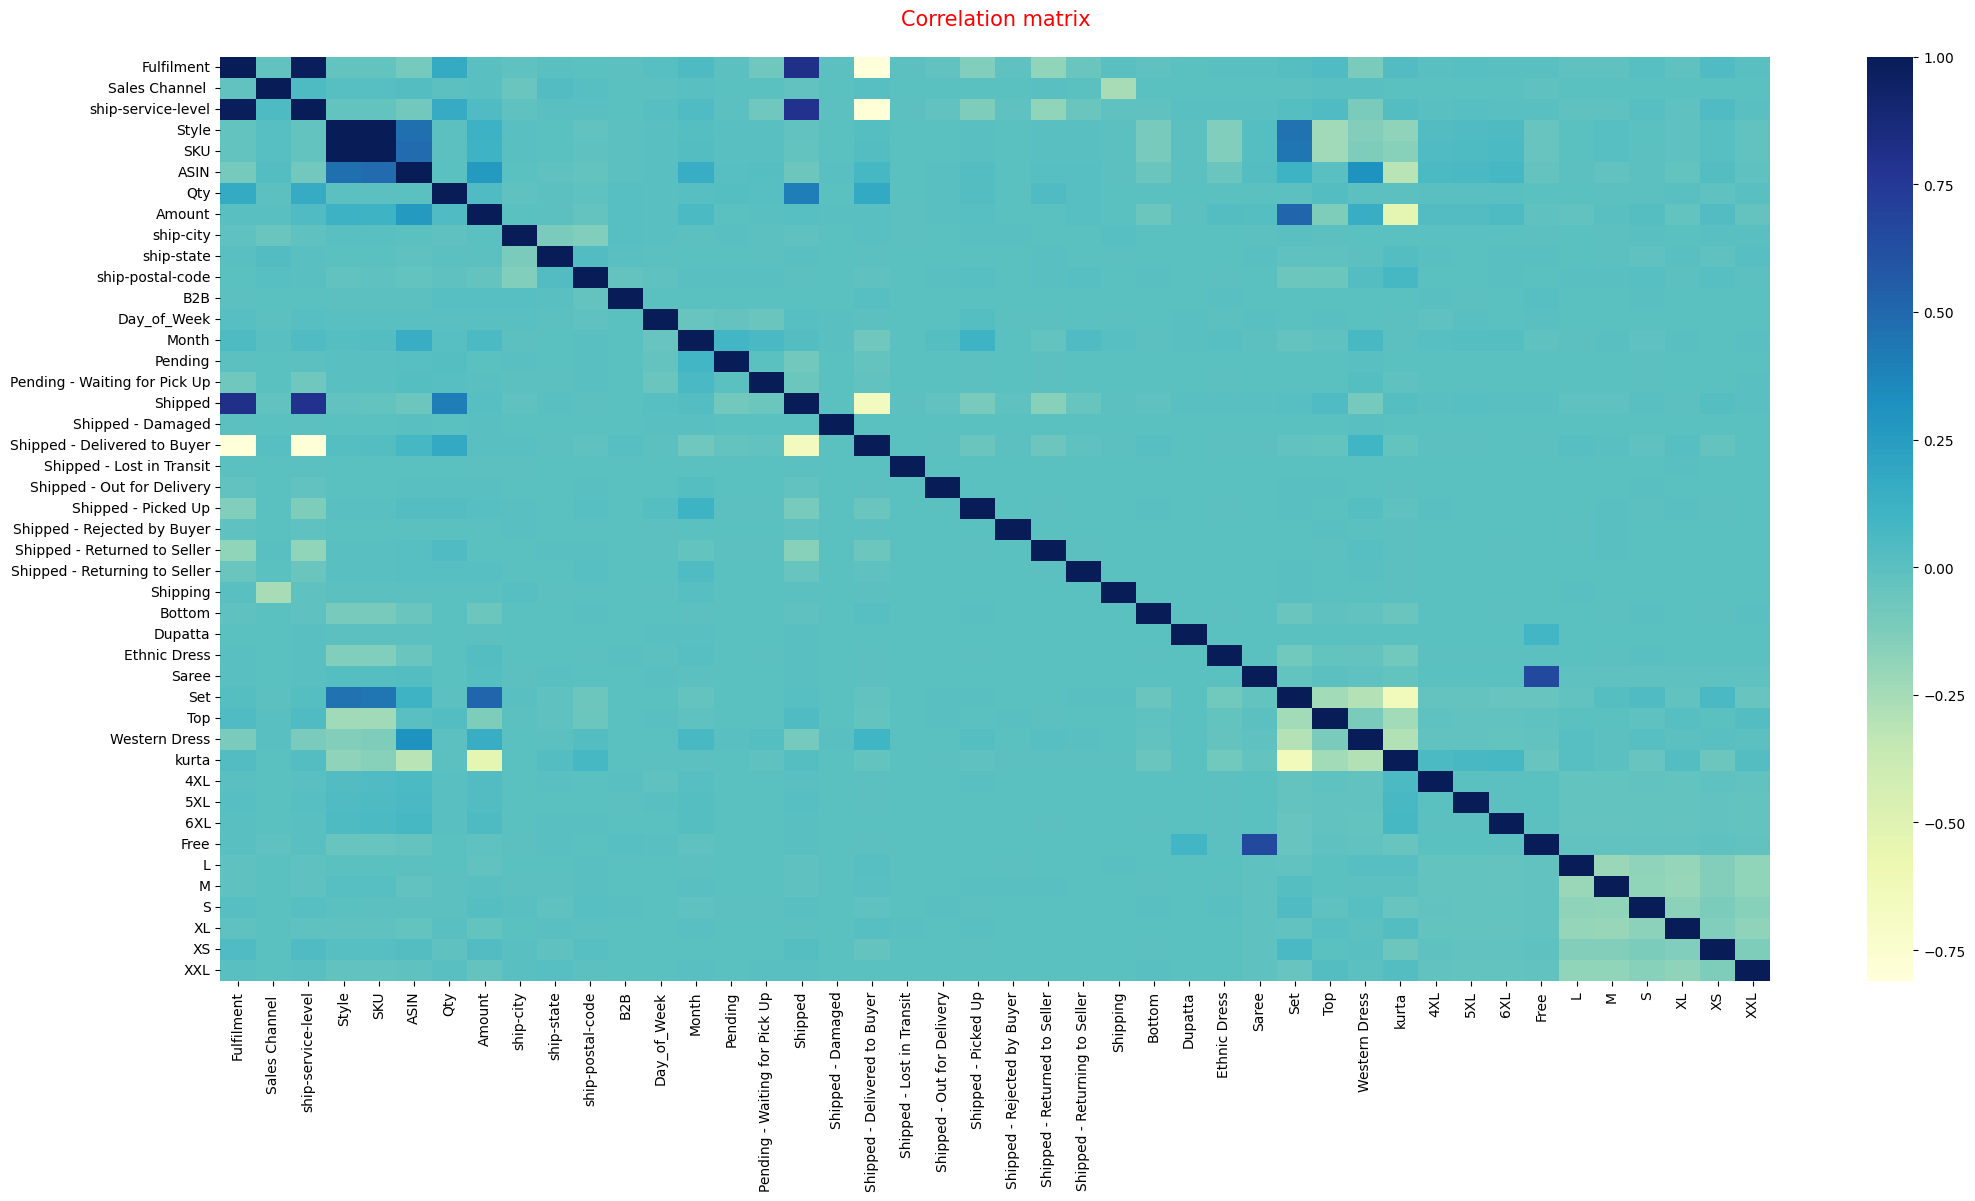

In [71]:
# Plotting a heatmap for ispecting correlation between the numeric variables

plt.figure(figsize=[25,12])
sns.heatmap(amazon_transformed_df.corr(), cmap="YlGnBu")
plt.title("Correlation matrix\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.show()

In [72]:
# Dropping column Fulfilment

amazon_transformed_df.drop(columns="Fulfilment", inplace=True)

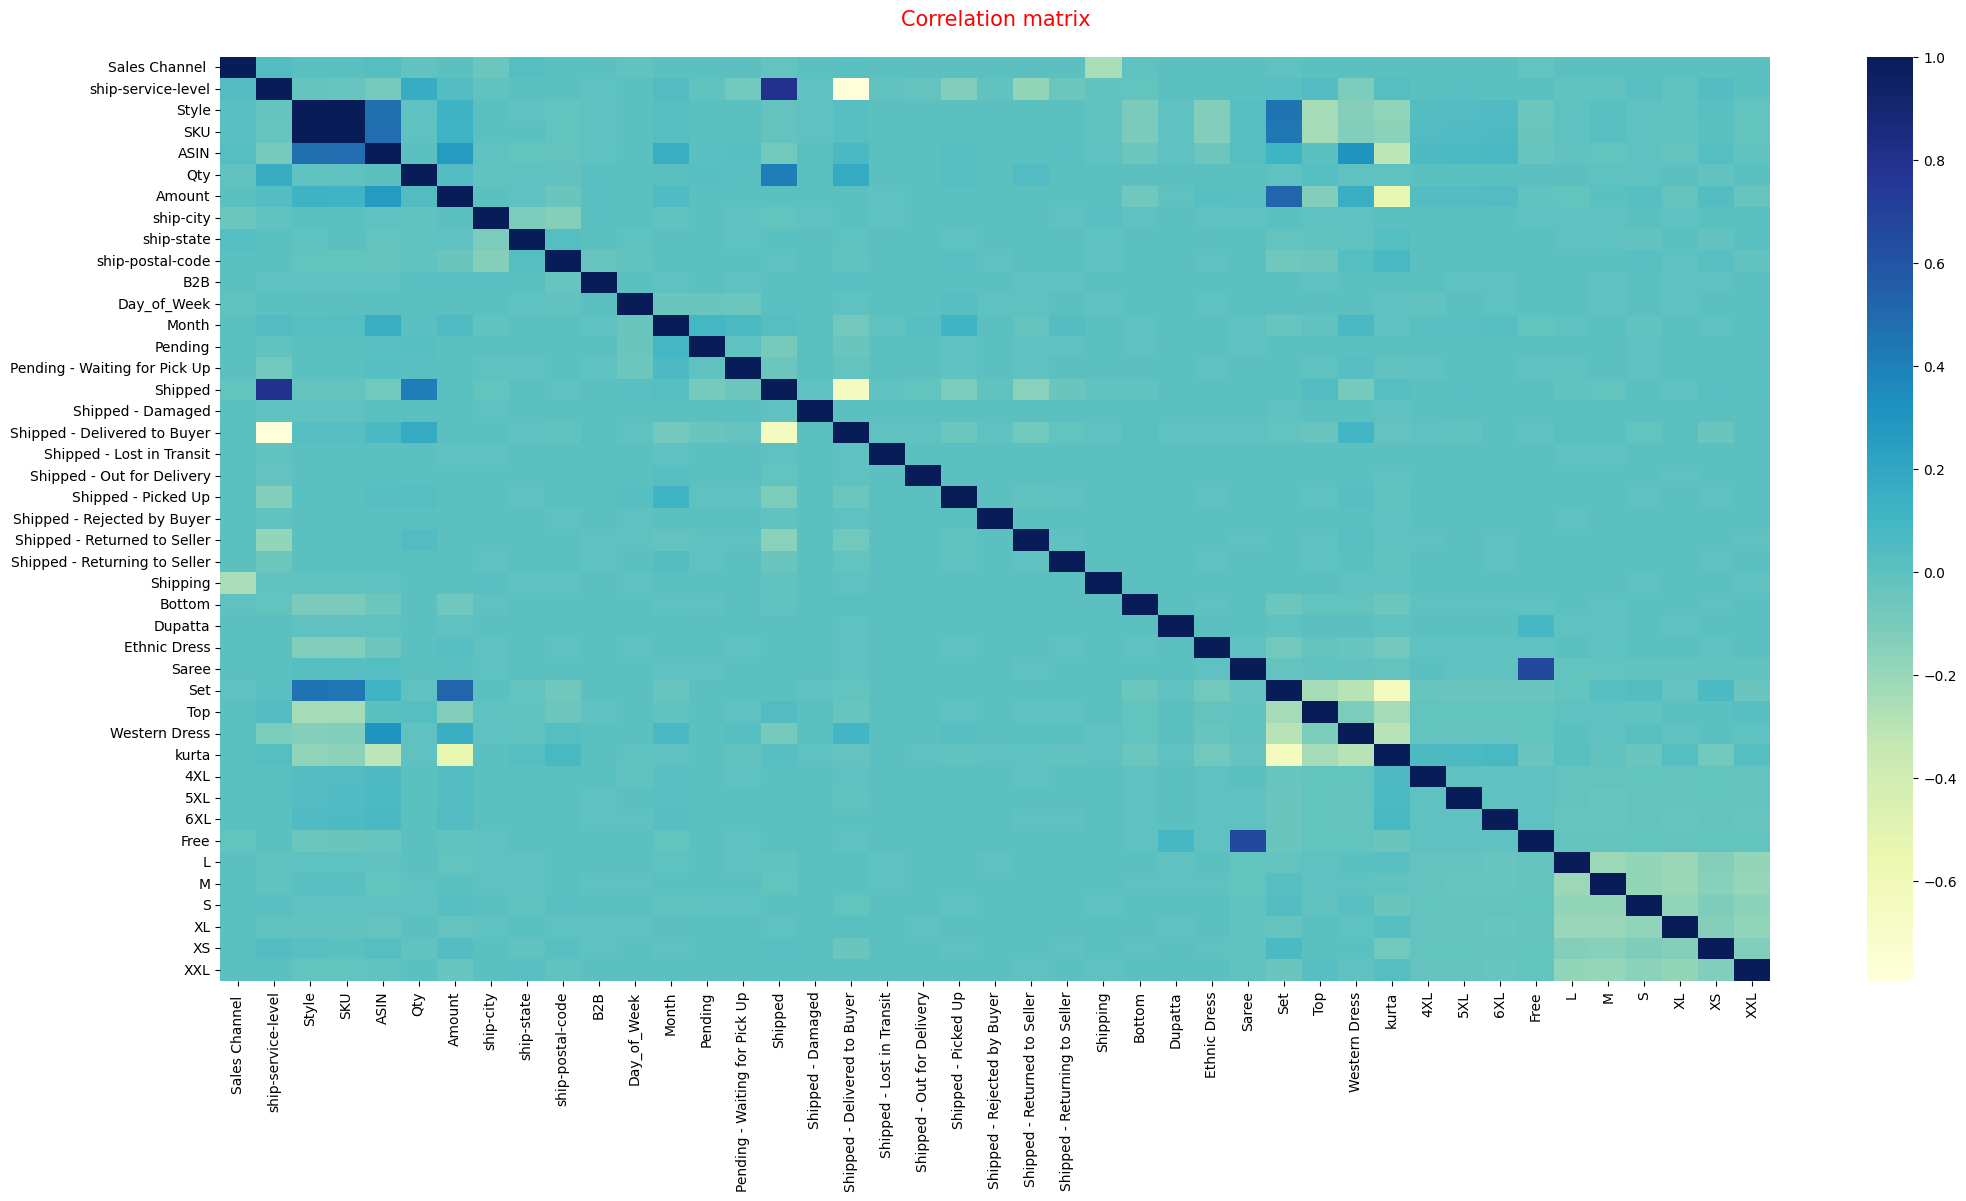

In [73]:
# Plotting a heatmap for ispecting correlation between the numeric variables

plt.figure(figsize=[25,12])
sns.heatmap(amazon_transformed_df.corr(), cmap="YlGnBu")
plt.title("Correlation matrix\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.show()

In [74]:
# Dropping column Fulfilment

amazon_transformed_df.drop(columns=["SKU", "Shipped"], inplace=True)

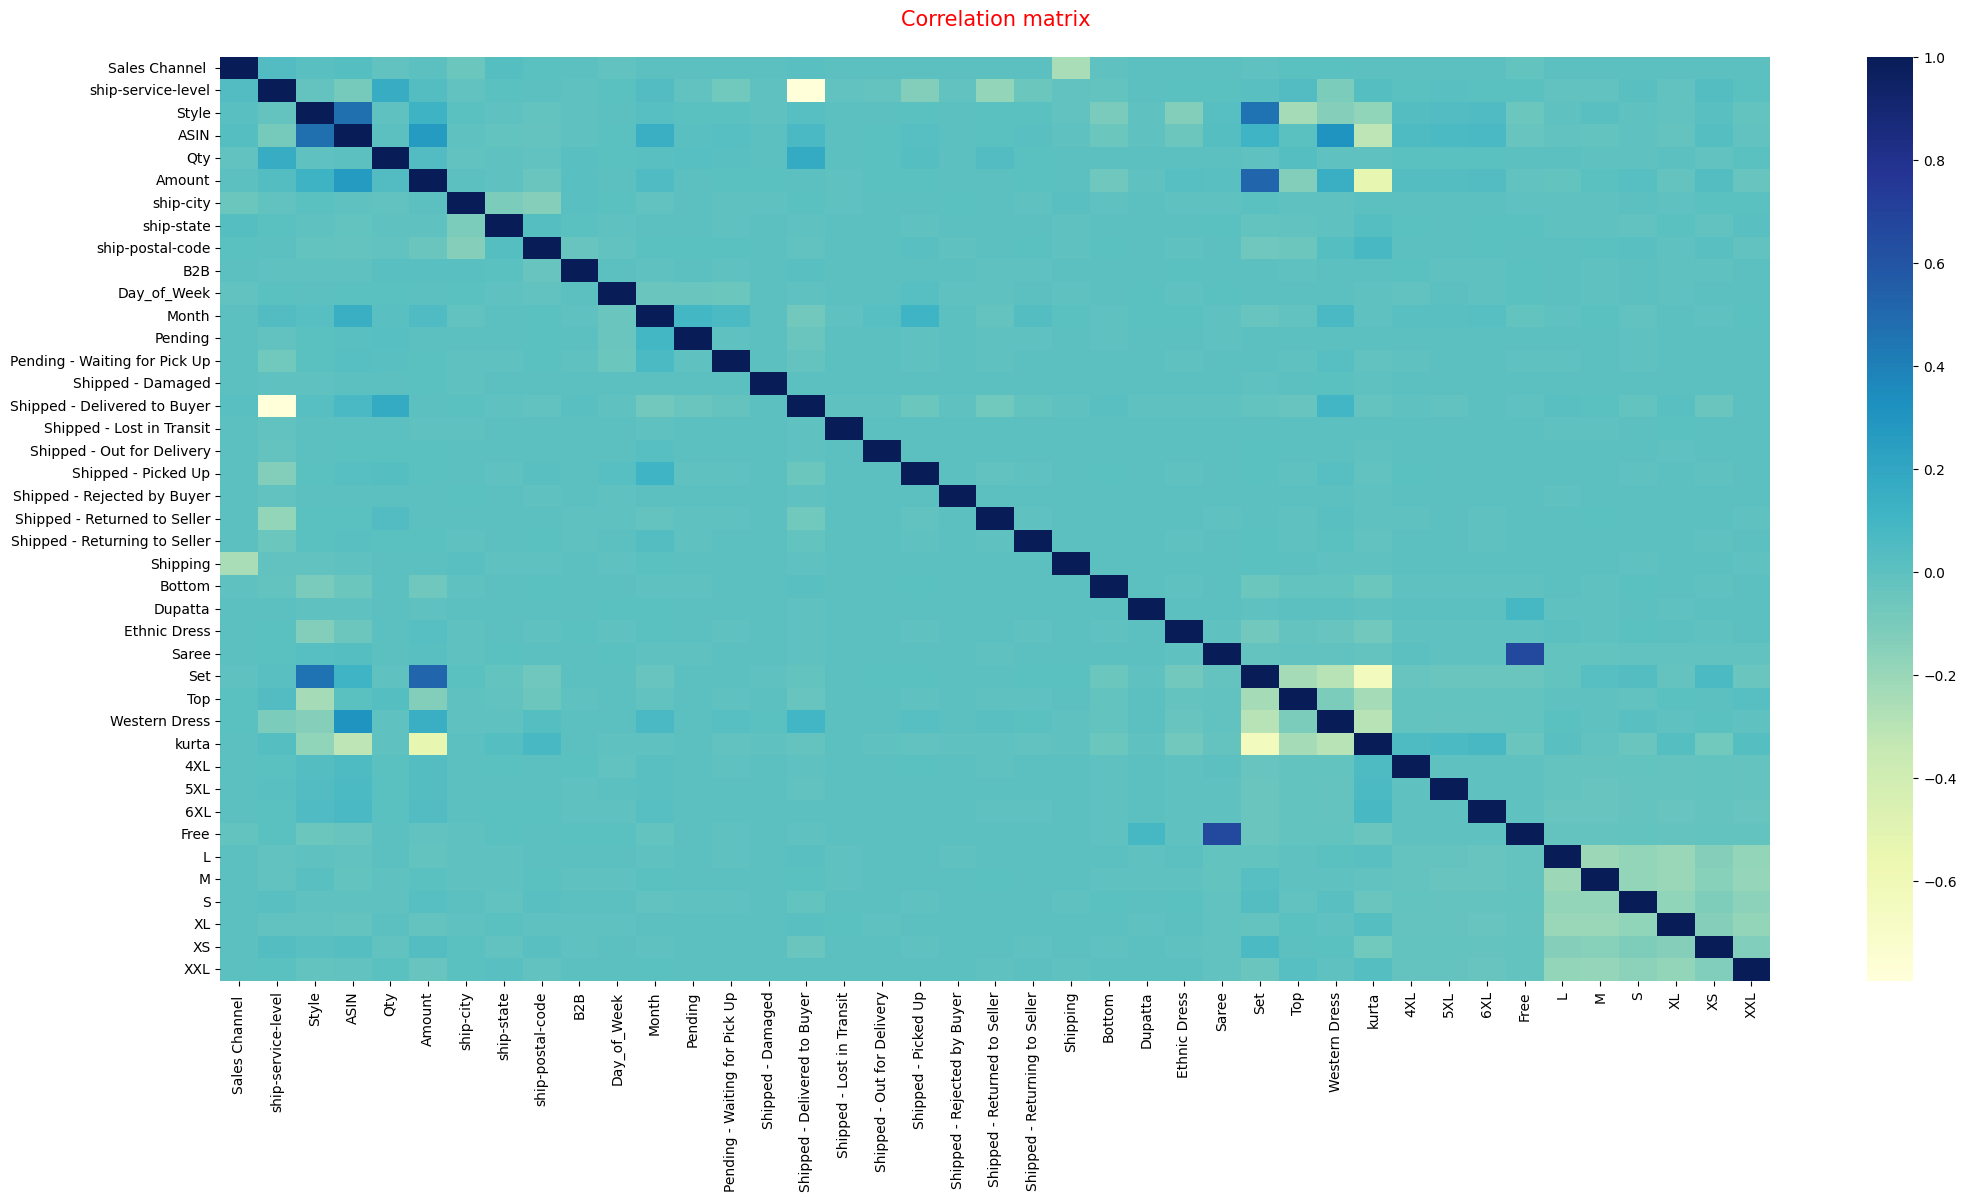

In [75]:
# Plotting a heatmap for ispecting correlation between the numeric variables

plt.figure(figsize=[25,12])
sns.heatmap(amazon_transformed_df.corr(), cmap="YlGnBu")
plt.title("Correlation matrix\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.show()

In [76]:
# Dropping column Fulfilment

amazon_transformed_df.drop(columns="Saree", inplace=True)

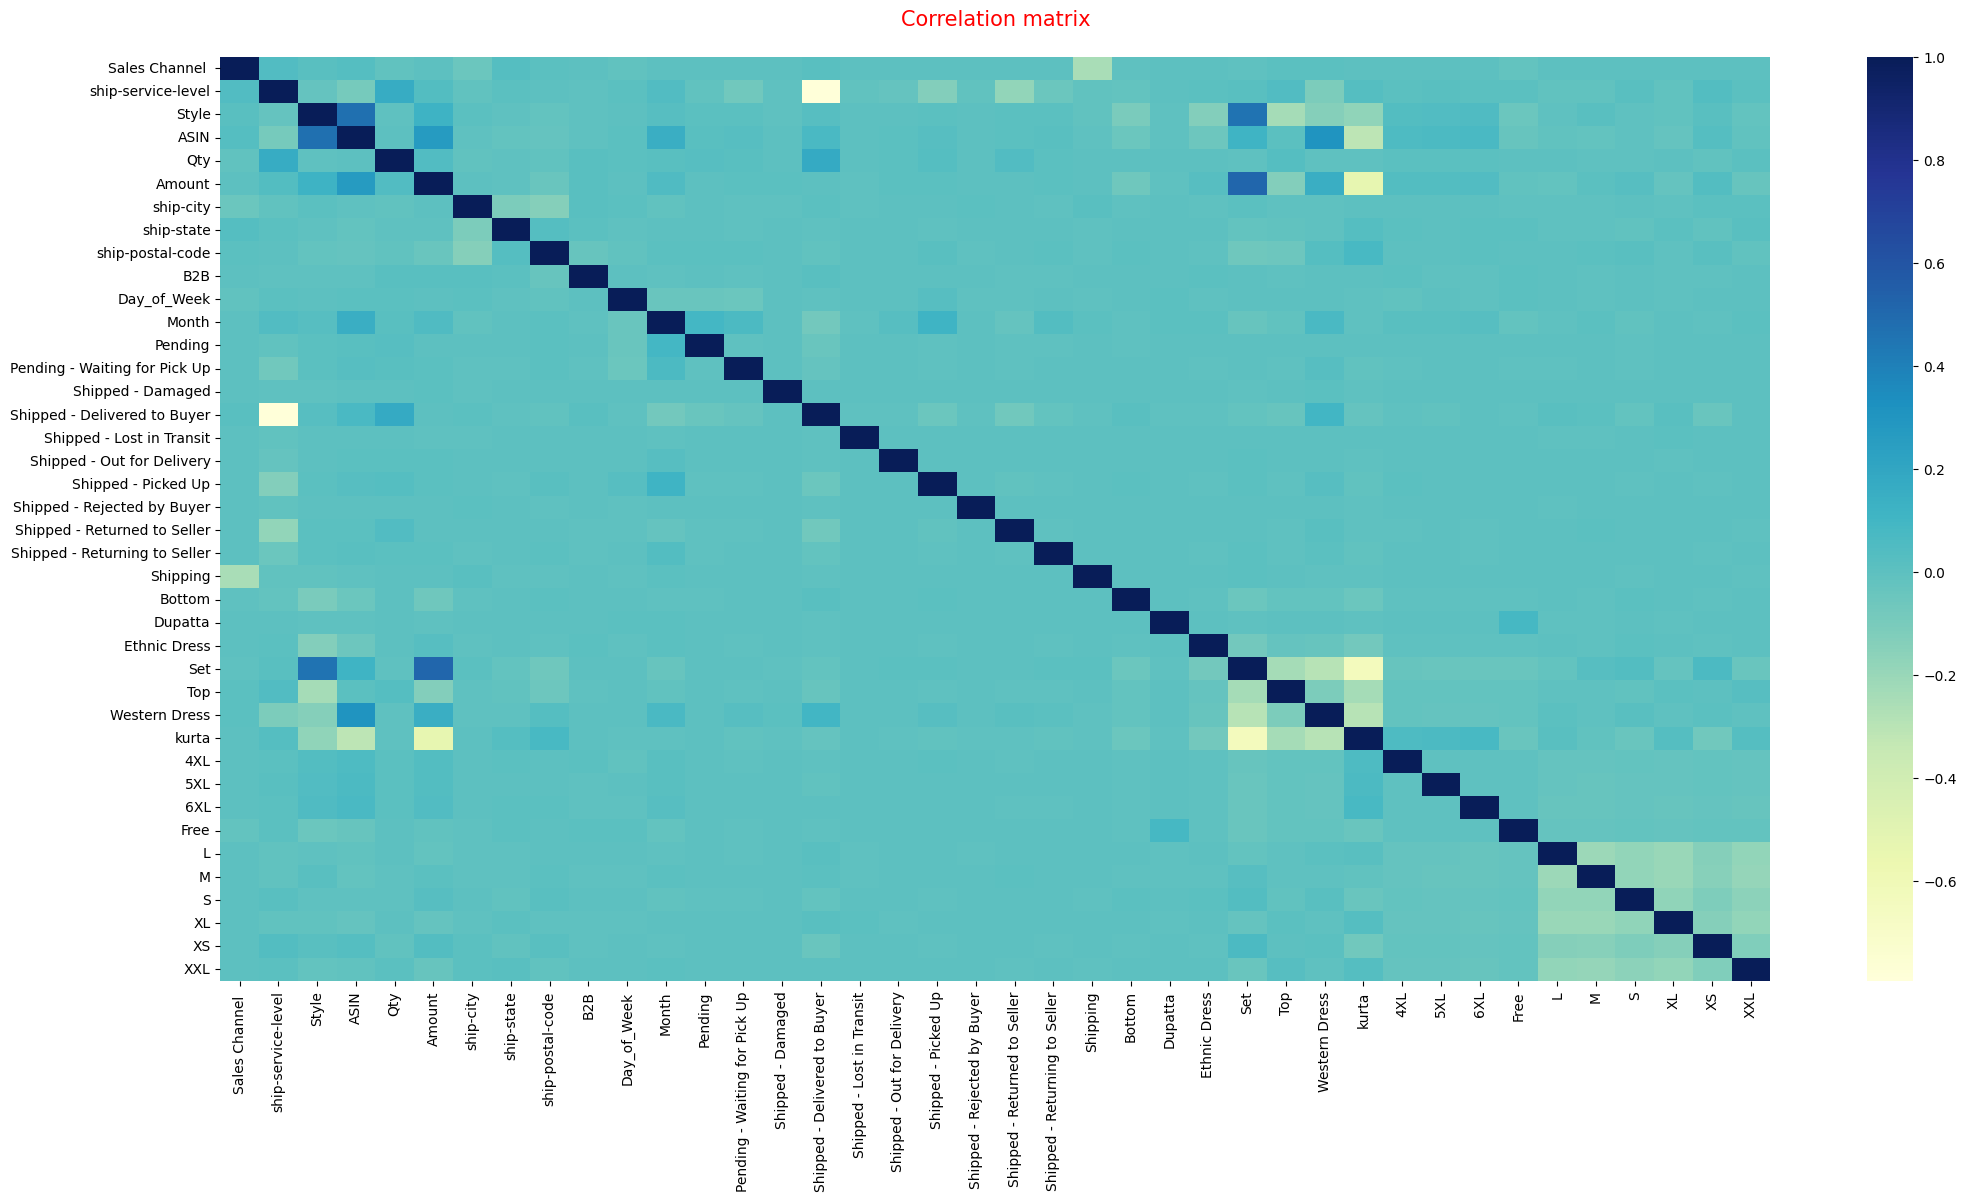

In [77]:
# Plotting a heatmap for ispecting correlation between the numeric variables

plt.figure(figsize=[25,12])
sns.heatmap(amazon_transformed_df.corr(), cmap="YlGnBu")
plt.title("Correlation matrix\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.show()

In [78]:
# Dropping column Fulfilment

amazon_transformed_df.drop(columns=["Set"], inplace=True)

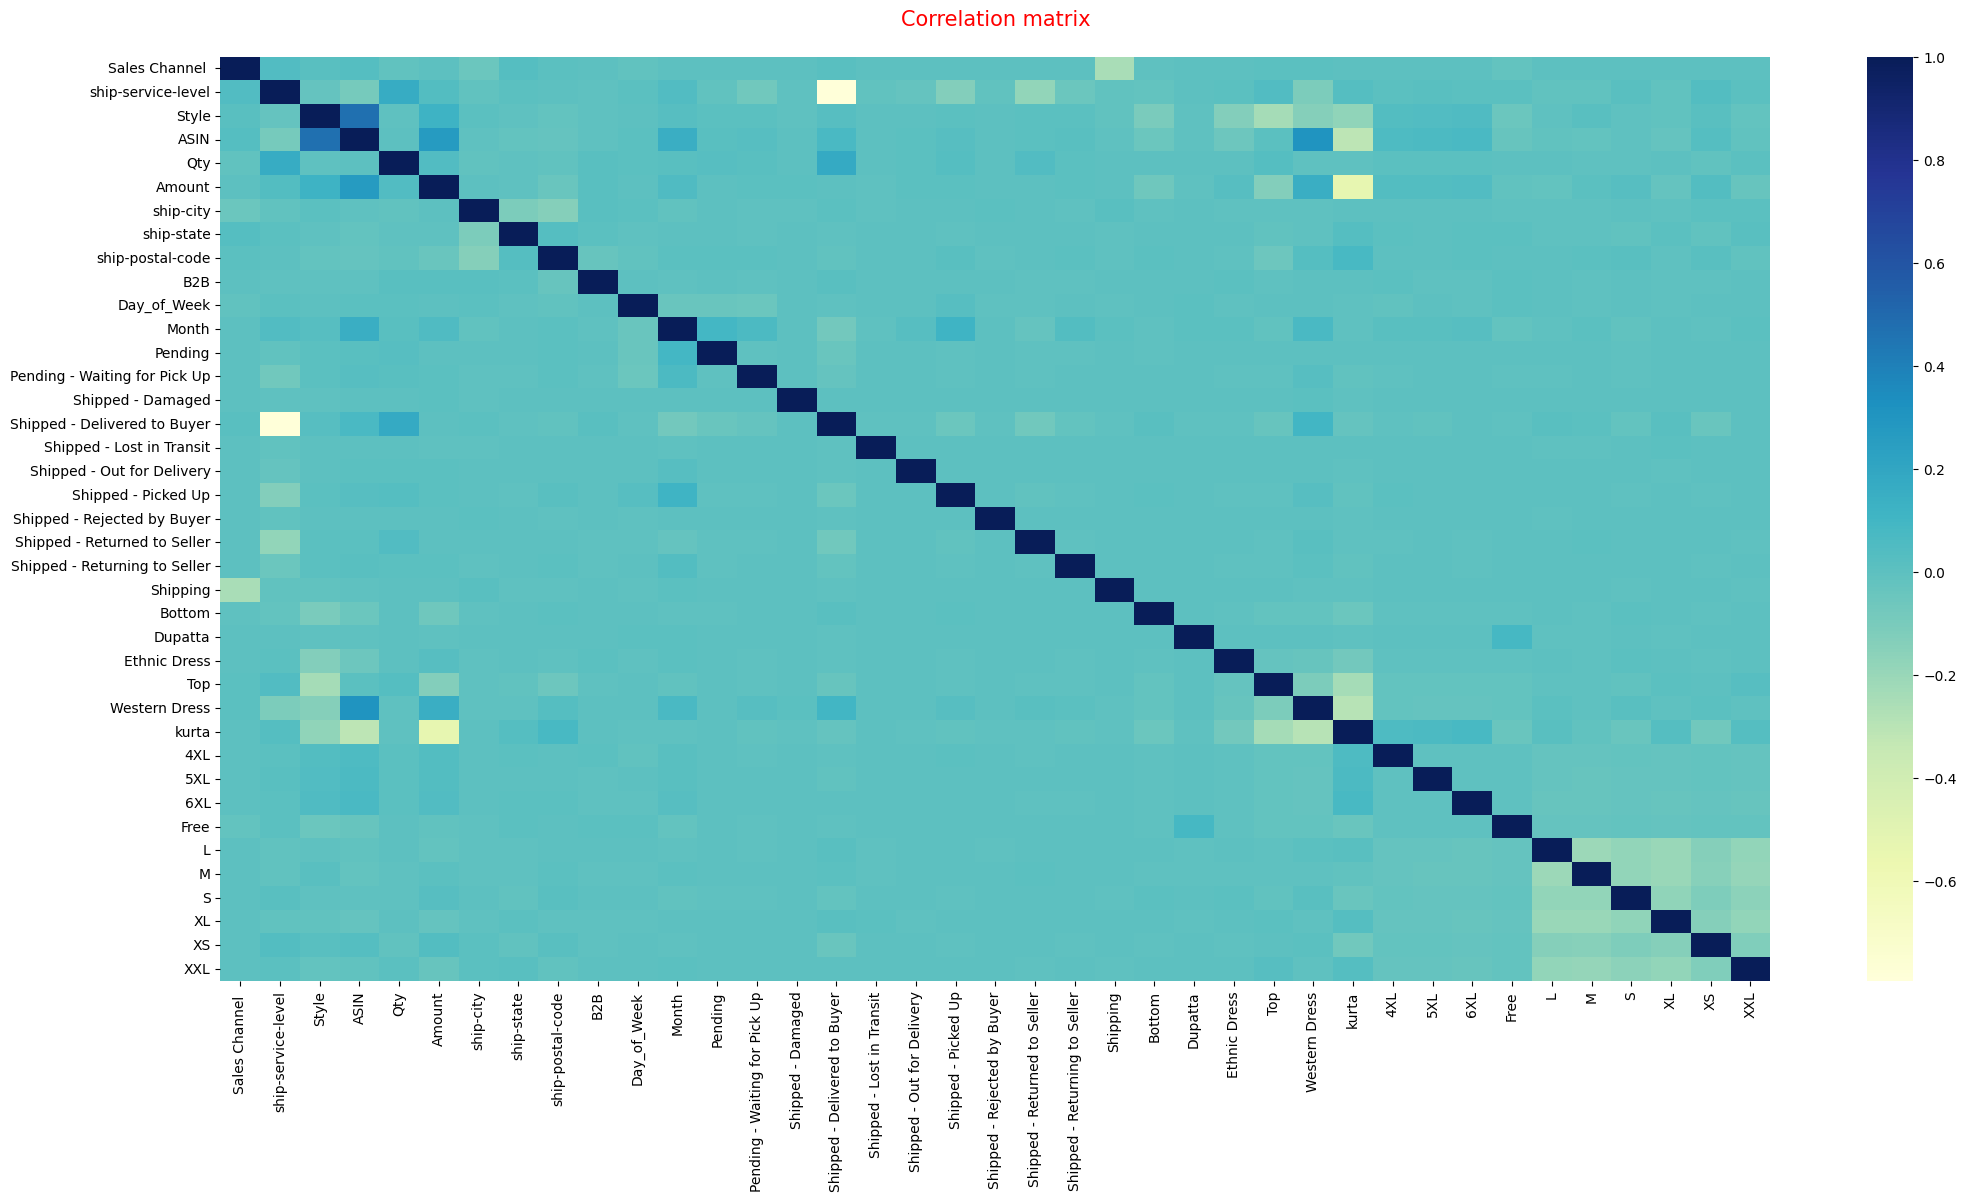

In [79]:
# Plotting a heatmap for ispecting correlation between the numeric variables

plt.figure(figsize=[25,12])
sns.heatmap(amazon_transformed_df.corr(), cmap="YlGnBu")
plt.title("Correlation matrix\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.show()

In [80]:
# Dropping column Fulfilment

amazon_transformed_df.drop(columns=["ship-service-level"], inplace=True)

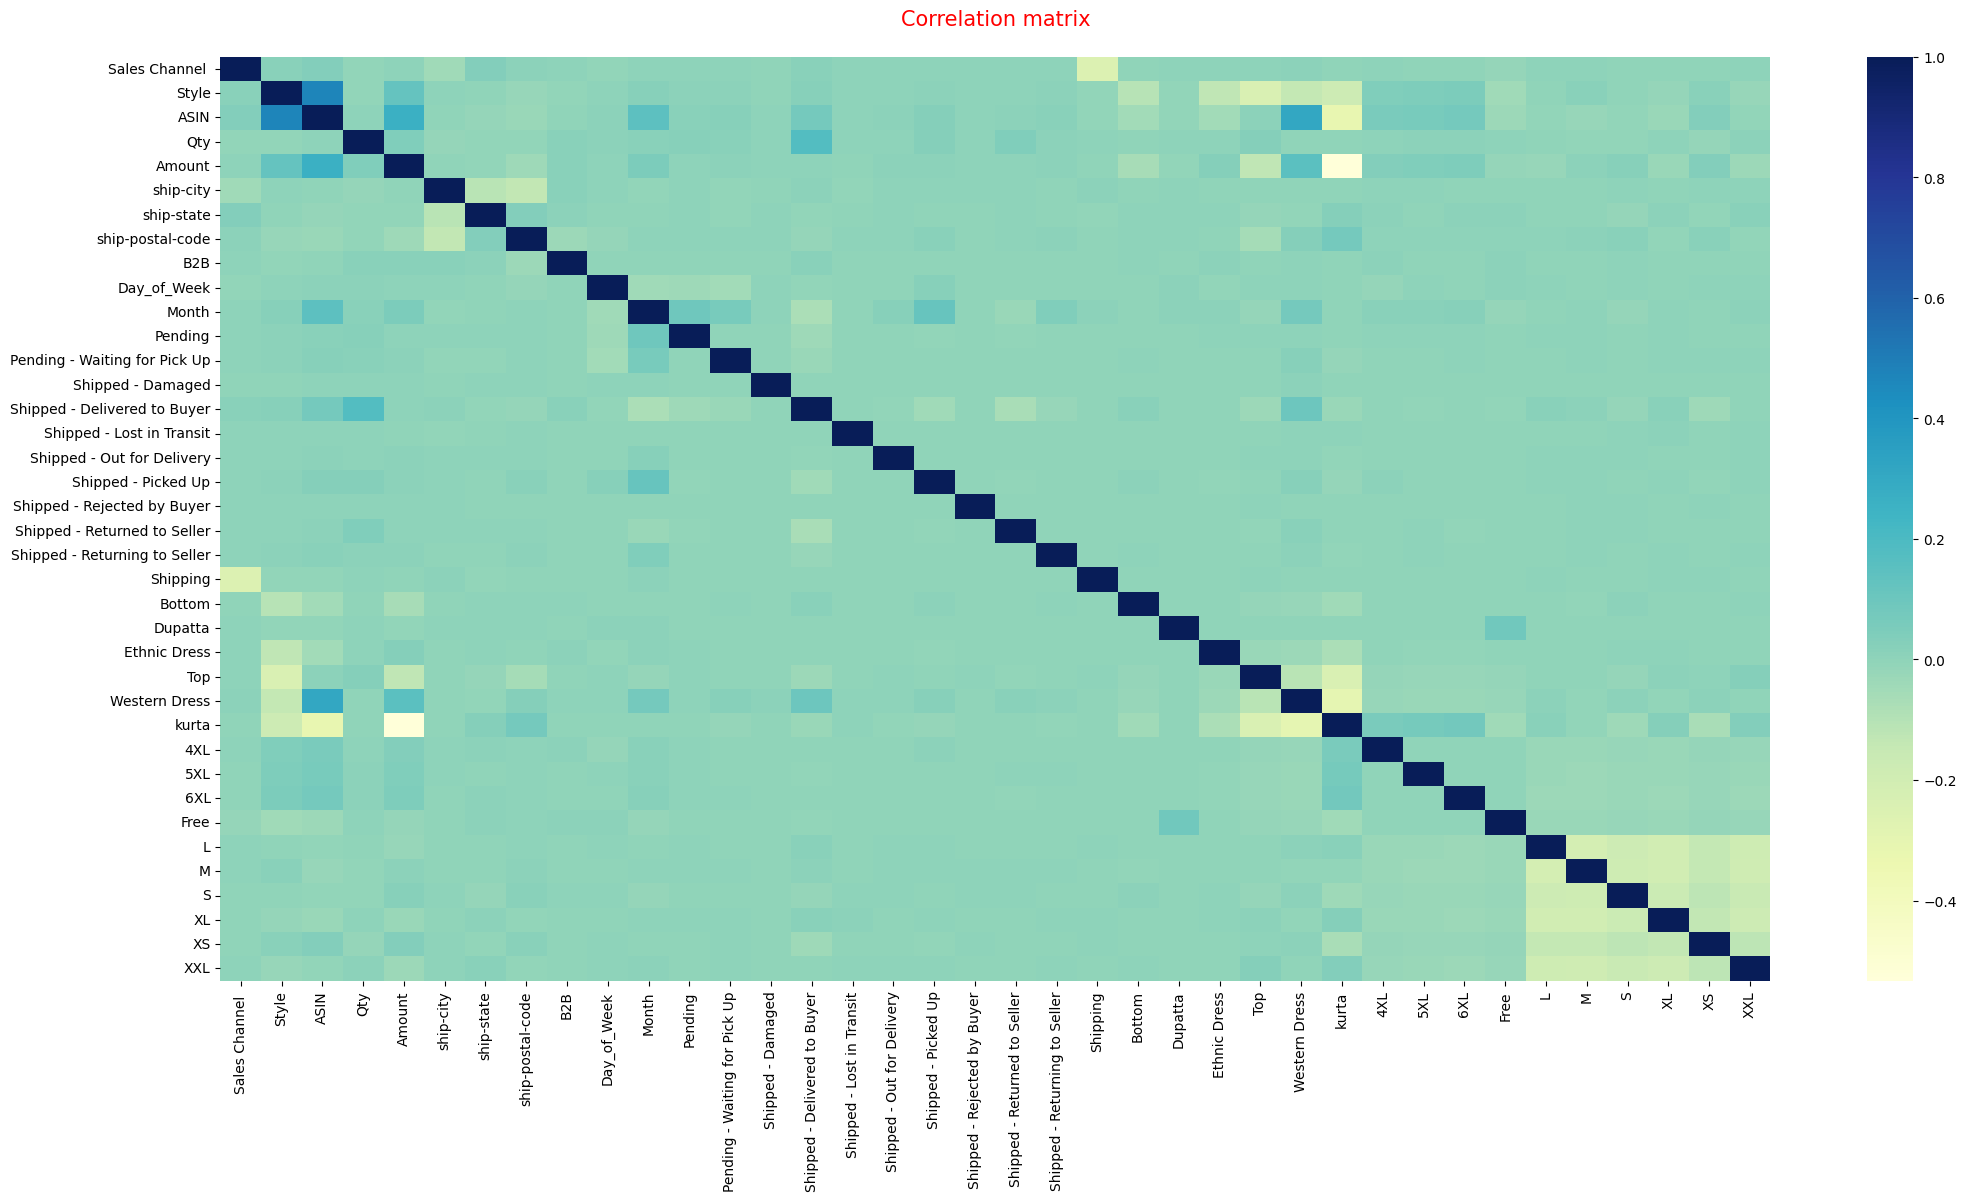

In [81]:
# Plotting a heatmap for ispecting correlation between the numeric variables

plt.figure(figsize=[25,12])
sns.heatmap(amazon_transformed_df.corr(), cmap="YlGnBu")
plt.title("Correlation matrix\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.show()

### Train Test Split

In [82]:
amazon_transformed_df.columns

Index(['Sales Channel ', 'Style', 'ASIN', 'Qty', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'B2B', 'Day_of_Week', 'Month',
       'Pending', 'Pending - Waiting for Pick Up', 'Shipped - Damaged',
       'Shipped - Delivered to Buyer', 'Shipped - Lost in Transit',
       'Shipped - Out for Delivery', 'Shipped - Picked Up',
       'Shipped - Rejected by Buyer', 'Shipped - Returned to Seller',
       'Shipped - Returning to Seller', 'Shipping', 'Bottom', 'Dupatta',
       'Ethnic Dress', 'Top', 'Western Dress', 'kurta', '4XL', '5XL', '6XL',
       'Free', 'L', 'M', 'S', 'XL', 'XS', 'XXL'],
      dtype='object')

In [83]:
# Separating target variable and independent variables

y = amazon_transformed_df.pop("Amount")
X = amazon_transformed_df

In [84]:
# Split the data into training and testing sets (70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The 'test_size' parameter determines the proportion of data to be allocated to the test set.
# 'random_state' ensures reproducibility by fixing the random seed.


In [85]:
X.describe()

,Sales Channel,Style,ASIN,Qty,ship-city,ship-state,B2B,Day_of_Week,Month,Pending,Pending - Waiting for Pick Up,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping,Bottom,Dupatta,Ethnic Dress,Top,Western Dress,kurta,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
count,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.000000,128941.00000
mean,0.999038,762.466361,3717.440403,0.900722,3209.553920,20.644706,0.006755,3.011951,4.909214,0.005103,0.002179,0.000008,0.223063,0.000039,0.000271,0.007546,0.000085,0.015123,0.001125,0.000062,0.003412,0.000023,0.008989,0.082363,0.120202,0.386681,0.003296,0.004266,0.005724,0.002932,0.171575,0.176081,0.132487,0.161872,0.086551,0.14032
std,0.030996,380.593634,2048.858166,0.299036,1942.727944,10.210218,0.081911,2.026497,0.818410,0.071254,0.046632,0.002785,0.416302,0.006227,0.016473,0.086540,0.009236,0.122043,0.033516,0.007877,0.058316,0.004823,0.094382,0.274918,0.325199,0.486991,0.057317,0.065172,0.075438,0.054065,0.377012,0.380890,0.339021,0.368335,0.281177,0.34732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,438.000000,1843.000000,1.000000,1363.000000,15.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,777.000000,3887.000000,1.000000,2947.000000,20.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,1143.000000,5612.000000,1.000000,4595.000000,31.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1376.000000,7189.000000,1.000000,7032.000000,36.000000,1.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Scaling

In [86]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Model Building

### Linear Regression Model

In [87]:
# Create a Linear Regression model
regression_model = LinearRegression()

# Fit the model on the training data
regression_model.fit(X_train_scaled, y_train)


LinearRegression()

In [88]:
# Make predictions on the train and test data

y_train_pred = regression_model.predict(X_train_scaled)
y_test_pred = regression_model.predict(X_test_scaled)

In [89]:
# Function to evaluate train and test scores

def train_test_score(y_train, y_test, y_train_pred, y_test_pred):

    # Calculate training metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate test metrics
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Return the scores in a dictionary
    scores = {
        'Mean Squared Error (MSE) train': mse_train,
        'Mean Absolute Error (MAE) train': mae_train,
        'R-squared (R2) Score train': r2_train,
        'Mean Squared Error (MSE) test': mse_test,
        'Mean Absolute Error (MAE) test': mae_test,
        'R-squared (R2) Score test': r2_test
    }
    return scores

In [90]:
# Evaluating the linear regression model

train_test_score(y_train, y_test, y_train_pred, y_test_pred)

{'Mean Squared Error (MSE) train': 40967.32276625967,
 'Mean Absolute Error (MAE) train': 144.55014641546012,
 'R-squared (R2) Score train': 0.42492240504267076,
 'Mean Squared Error (MSE) test': 41004.90057075955,
 'Mean Absolute Error (MAE) test': 144.4904289914778,
 'R-squared (R2) Score test': 0.43025759785226403}

**Mean Squared Error (MSE):** The MSE represents the average of the squared differences between the actual target values "Amount" and the predicted values. As we can see, the MSE is approximately 41004.90. Considering the scale of the "Amount" variable, which has a maximum value of 1442 and a mean of 644.62, an MSE of 41004.90 is relatively high. It indicates a substantial level of error in your model's predictions, especially when compared to the range and mean of the target variable.

**R-squared (R2) Score:** The R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit. In your result, the R2 score is approximately 0.43, which means that your model explains about 43% of the variance in the target variable. An R2 score of 1 would mean a perfect fit, while a score of 0 indicates that the model doesn't explain any of the variance.

These metrics provide an initial assessment of your linear regression model's performance. You may want to explore more complex regression models or fine-tune hyperparameters to improve predictive accuracy based on your specific modeling goals and the nature of your data. Additionally, you can use other regression evaluation metrics and techniques for model validation and improvement.

In [91]:
y.describe()

count    128941.000000
mean        644.624374
std         267.317377
min           0.000000
25%         459.000000
50%         605.000000
75%         771.000000
max        1442.000000
Name: Amount, dtype: float64

### Scaling

In [92]:
#Create a MinMaxScaler instance
mscaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_mscaled = mscaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_mscaled = mscaler.transform(X_test)

In [93]:
# Create a Linear Regression model
regression_model_2 = LinearRegression()

# Fit the model on the training data
regression_model_2.fit(X_train_mscaled, y_train)


LinearRegression()

In [94]:
# Make predictions on the train and test data

y_train_pred_m = regression_model_2.predict(X_train_mscaled)
y_test_pred_m = regression_model_2.predict(X_test_mscaled)

In [95]:
# Evaluating the linear regression model

train_test_score(y_train, y_test, y_train_pred_m, y_test_pred_m)

{'Mean Squared Error (MSE) train': 40967.32276625968,
 'Mean Absolute Error (MAE) train': 144.55014641546012,
 'R-squared (R2) Score train': 0.42492240504267076,
 'Mean Squared Error (MSE) test': 41004.90057075955,
 'Mean Absolute Error (MAE) test': 144.49042899147784,
 'R-squared (R2) Score test': 0.43025759785226403}

### Building Linear Regression Model using K fold Cross validation

**GridSearchCV with 5 folds**

In [96]:
# Building cross validation model

model_cv = LinearRegression().fit(X, y)

In [98]:
# Evaluating the cross validation
predictions_cv = cross_val_predict(model_cv, X, y, cv=10)
accuracy = metrics.r2_score(y, predictions_cv)
print("Cross-Predicted Accuracy:", accuracy)
print('Mean Squared Error: {}'.format(mean_squared_error(y, predictions_cv)))

Cross-Predicted Accuracy: 0.4232143247947172
Mean Squared Error: 41215.96571486316


In [99]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_cv, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.43612034 0.47852224 0.46827063 0.42888998 0.39048217 0.38038634
 0.41980786 0.42248381 0.40385577 0.39109206]


In [101]:
from sklearn.metrics import make_scorer

In [106]:
# Define scoring metrics
scoring = {'neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'}

In [109]:
# Perform 10-fold cross-validation


scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

for metric in scoring_metrics:
    cv_results = cross_val_score(model_cv, X, y, cv=10, scoring=metric)
    print(f"{metric}: {cv_results.mean()}")

neg_mean_squared_error: -41215.98785659733
neg_mean_absolute_error: -145.2297278133783
r2: 0.42199112020896495


In [111]:
from sklearn.model_selection import cross_validate
# Perform 10-fold cross-validation with multiple scoring metrics
cv_results = cross_validate(model_cv, X, y, cv=10, scoring=scoring_metrics, return_train_score=True)

# Display results for each metric
for metric in scoring_metrics:
    train_score_mean = - cv_results[f'train_{metric}'].mean()
    test_score_mean = - cv_results[f'test_{metric}'].mean()
    print(f"{metric} - Train: {train_score_mean}, Test: {test_score_mean}")

neg_mean_squared_error - Train: 40961.54654728642, Test: 41215.98785659733
neg_mean_absolute_error - Train: 144.52352680564147, Test: 145.2297278133783
r2 - Train: -0.42675936148280735, Test: -0.42199112020896495


### Decision Tree

In [193]:
# Define the Decision Tree model
decisiontree_model = DecisionTreeRegressor(random_state=42)

In [194]:
# Fit the Decision Tree model on the scaled training data
decisiontree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [195]:
# Make predictions on the train and test data

y_train_pred_dt = decisiontree_model.predict(X_train_scaled)
y_test_pred_dt = decisiontree_model.predict(X_test_scaled)

In [196]:
# Evaluating the linear regression model

train_test_score(y_train, y_test, y_train_pred_dt, y_test_pred_dt)

{'Mean Squared Error (MSE) train': 76.54694920874974,
 'Mean Absolute Error (MAE) train': 0.303295774335793,
 'R-squared (R2) Score train': 0.9989254744396296,
 'Mean Squared Error (MSE) test': 30393.500635383116,
 'Mean Absolute Error (MAE) test': 56.93440438952513,
 'R-squared (R2) Score test': 0.5776976453875313}

### Random Forest Model

In [197]:
# Define the Random Forest model
randomforest_model = RandomForestRegressor(random_state=42)

In [198]:
# Fit the Random Forest model on the scaled training data
randomforest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [199]:
# Make predictions on the train and test data

y_train_pred_rf = randomforest_model.predict(X_train_scaled)
y_test_pred_rf = randomforest_model.predict(X_test_scaled)

In [200]:
# Evaluating the linear regression model

train_test_score(y_train, y_test, y_train_pred_rf, y_test_pred_rf)

{'Mean Squared Error (MSE) train': 2311.5566163961607,
 'Mean Absolute Error (MAE) train': 19.32976353534386,
 'R-squared (R2) Score train': 0.9675515916148754,
 'Mean Squared Error (MSE) test': 15974.356113372882,
 'Mean Absolute Error (MAE) test': 51.34388551592598,
 'R-squared (R2) Score test': 0.7780443825466432}

**Best Model**

In [201]:
# Define the hyperparameters to tune
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [202]:
# Use GridSearchCV for hyperparameter tuning
gridsearch = GridSearchCV(estimator=randomforest_model, param_grid=parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gridsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [203]:
# Get the best hyperparameters
best_params = gridsearch.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


In [204]:
# Make predictions on the test set using the best model
best_rf_model = gridsearch.best_estimator_
y_pred_rfb = best_rf_model.predict(X_test_scaled)

In [205]:
# Evaluate the model
mse_rfb = mean_squared_error(y_test, y_pred_rfb)
r2_rfb = r2_score(y_test, y_pred_rfb)

print(f"Mean Squared Error (MSE): {mse_rfb}")
print(f"R-squared (R2) Score: {r2_rfb}")

Mean Squared Error (MSE): 14214.278477916143
R-squared (R2) Score: 0.8024997731471198


In [206]:
# Fit the model to your training data
best_rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [207]:
# Make predictions on the train and test data

y_train_pred_rfb = best_rf_model.predict(X_train_scaled)
y_test_pred_rfb = best_rf_model.predict(X_test_scaled)

In [208]:
# Evaluating the linear regression model

train_test_score(y_train, y_test, y_train_pred_rfb, y_test_pred_rfb)

{'Mean Squared Error (MSE) train': 8840.233046487932,
 'Mean Absolute Error (MAE) train': 36.608268752345225,
 'R-squared (R2) Score train': 0.8759054872039729,
 'Mean Squared Error (MSE) test': 14214.278477916143,
 'Mean Absolute Error (MAE) test': 48.67132288151028,
 'R-squared (R2) Score test': 0.8024997731471198}

In [113]:
# Assuming you have X and y defined
model_fff = RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, n_estimators=150, random_state=42)

# Fit the model to the data
model_fff.fit(X_train_scaled, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [114]:
featureimportances = model_fff.feature_importances_

In [115]:
# Get the names of the features
featurenames = X_train.columns

In [116]:
# Sort the features based on their importance
sortedindices = featureimportances.argsort()[::-1]

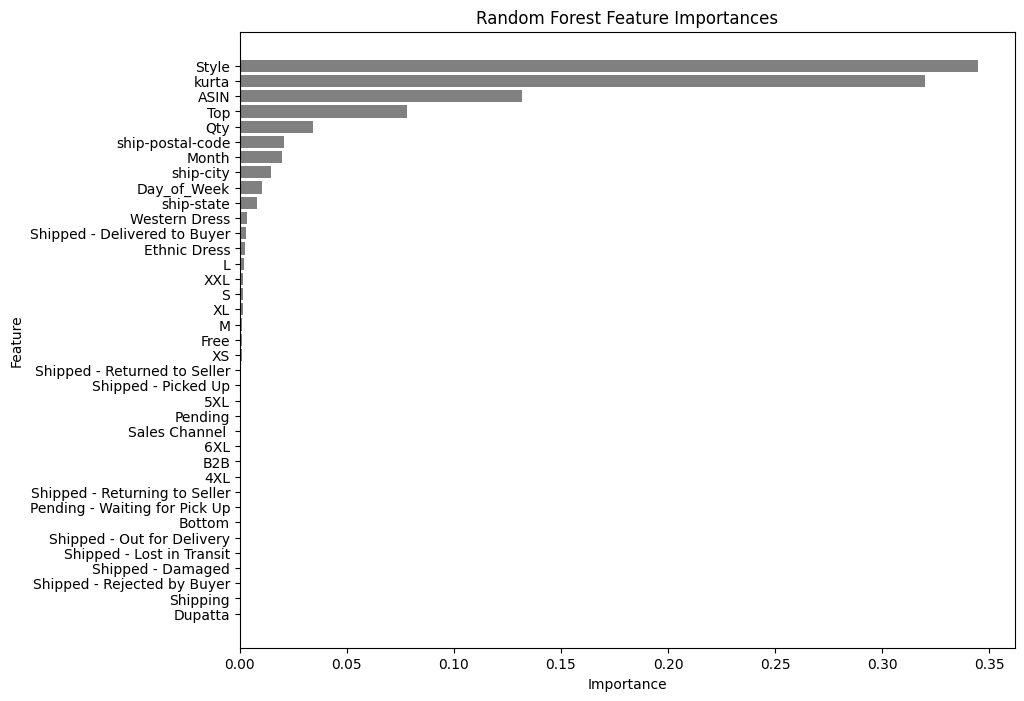

In [125]:
plt.figure(figsize=(10, 8))
plt.barh(range(X_train.shape[1]), featureimportances[sortedindices[::-1]], color='grey')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.yticks(range(X_train.shape[1]), featurenames[sortedindices][::-1])
plt.title("Random Forest Feature Importances")
plt.show()

In [124]:
# Assuming you have already defined featureimportances, sortedindices, and featurenames
importance_list = list(zip(featurenames[sortedindices], featureimportances[sortedindices]))

# Print the feature importances as a list
print("Feature Importances:")
for feature, importance in importance_list:
    print(f"{feature}: {importance}")

Feature Importances:
Style: 0.3448354564396203
kurta: 0.320164298086696
ASIN: 0.13200039648690665
Top: 0.07788701317219555
Qty: 0.03404230374269661
ship-postal-code: 0.020625884141708756
Month: 0.019819306666202498
ship-city: 0.014625091542010398
Day_of_Week: 0.010201325041397912
ship-state: 0.007795830575208461
Western Dress: 0.0033138810746458566
Shipped - Delivered to Buyer: 0.00271287710637494
Ethnic Dress: 0.0022206215435412193
L: 0.0017229169035159338
XXL: 0.001618218314122726
S: 0.00142034052239157
XL: 0.0012728650559279031
M: 0.0011902953126887604
Free: 0.000826521489725558
XS: 0.0007492180041695976
Shipped - Returned to Seller: 0.0003805361667035805
Shipped - Picked Up: 0.00011125033311024632
5XL: 0.0001021871481990462
Pending: 9.842668876355399e-05
Sales Channel : 8.584844329743776e-05
6XL: 7.511037040096571e-05
B2B: 3.929318824074275e-05
4XL: 3.564000374582031e-05
Shipped - Returning to Seller: 2.1355822567865057e-05
Pending - Waiting for Pick Up: 4.167778035531795e-06
Botto

### Feature Importance using Random Forest

In [209]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

In [210]:
# Get the names of the features
feature_names = X_train.columns

In [211]:
# Sort the features based on their importance
sorted_indices = feature_importances.argsort()[::-1]

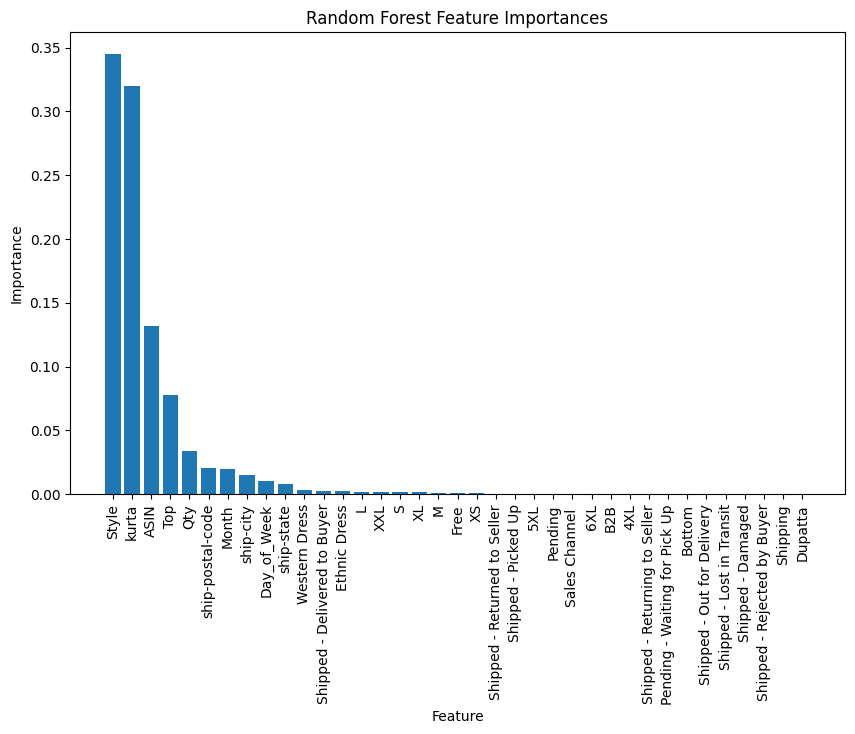

In [212]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()

### Principal Component Analysis

In [223]:
# Apply PCA to the scaled training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [224]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [225]:
# Cumulative explained variance
cuml_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance: ",cuml_explained_variance)

Cumulative Explained Variance:  [0.04947894 0.08745264 0.12273156 0.15638795 0.18954002 0.22210412
 0.25454777 0.28662045 0.31827375 0.34912089 0.37912646 0.4083249
 0.43726192 0.46583872 0.49360746 0.52132523 0.54866262 0.57584485
 0.60291797 0.62996305 0.65699435 0.68402061 0.71101561 0.73796603
 0.76489158 0.79149919 0.81761427 0.84287597 0.86802494 0.8923185
 0.91480115 0.93652858 0.95645352 0.97558263 0.98941075 0.99636836
 1.        ]


In [226]:
# Determine the optimal number of components to retain based on the explained variance
optimalcomponents = len(cuml_explained_variance[cuml_explained_variance <= 0.95]) + 1
print(f"Optimal Number of Components: {optimalcomponents}")

Optimal Number of Components: 33


In [227]:
# Apply PCA to the test data using the same components
X_test_pca = pca.transform(X_test_scaled)[:, :optimalcomponents]

In [228]:
# Fit a linear regression model on the PCA-transformed training data

pca_rf_model = gridsearch.best_estimator_


In [229]:
y_pred_rf_pca = pca_rf_model.fit(X_train_pca[:, :optimalcomponents], y_train)

In [230]:
# Make predictions on the train and test data

y_train_pred_pca = pca_rf_model.predict(X_train_pca[:, :optimalcomponents])
y_test_pred_pca = pca_rf_model.predict(X_test_pca)

In [231]:
# Make predictions on the test set
y_pred_rf_pca = pca_rf_model.predict(X_test_pca)

# Evaluate the model
mse_rf_pca = mean_squared_error(y_test, y_pred_rf_pca)
r2_rf_pca = r2_score(y_test, y_pred_rf_pca)

print(f"Mean Squared Error (MSE): {mse_rf_pca}")
print(f"R-squared (R2) Score: {r2_rf_pca}")

Mean Squared Error (MSE): 31221.499635193613
R-squared (R2) Score: 0.5661930170977031


### Ridge Regression

In [87]:
# Create a Ridge regression model

ridge_mod = Ridge(alpha=1.0)

In [88]:
# Fit the Ridge model on the scaled training data

ridge_mod.fit(X_train_scaled, y_train)

Ridge()

In [93]:
# Make predictions on the train test set

y_train_pred_ridge = ridge_mod.predict(X_train_scaled)
y_test_pred_ridge = ridge_mod.predict(X_test_scaled)

In [94]:
# Evaluating the linear regression model

train_test_score(y_train, y_test, y_train_pred_ridge, y_test_pred_ridge)

{'Mean Squared Error (MSE) train': 40967.322785332755,
 'Mean Absolute Error (MAE) train': 144.5501975153157,
 'R-squared (R2) Score train': 0.4249224047749329,
 'Mean Squared Error (MSE) test': 41004.907625439664,
 'Mean Absolute Error (MAE) test': 144.49048827114913,
 'R-squared (R2) Score test': 0.43025749983104367}

### Lasso Regression

In [95]:
# Create a Lasso regression model

lasso_mod = Lasso(alpha=1.0)

In [96]:
# Fit the Lasso model on the scaled training data

lasso_mod.fit(X_train_scaled, y_train)

Lasso()

In [97]:
# Make predictions on the train test set


y_train_pred_lasso = lasso_mod.predict(X_train_scaled)
y_test_pred_lasso = lasso_mod.predict(X_test_scaled)

In [99]:
# Evaluating the linear regression model

train_test_score(y_train, y_test, y_train_pred_lasso, y_test_pred_lasso)

{'Mean Squared Error (MSE) train': 41014.645337689275,
 'Mean Absolute Error (MAE) train': 144.68117839041915,
 'R-squared (R2) Score train': 0.4242581158305052,
 'Mean Squared Error (MSE) test': 41039.120732409756,
 'Mean Absolute Error (MAE) test': 144.59486876030252,
 'R-squared (R2) Score test': 0.4297821259738033}